# Loading R packages and dataset

In [33]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [34]:
%%R 
## load necessary packages and display session info
load_packages<-c('ggplot2','ggsignif','ggthemes','RColorBrewer','reshape2','tidyr','scales','dplyr','readxl','Peptides')
lapply(load_packages, require, character.only = TRUE)
Sys.setlocale("LC_ALL","English")
print(sessionInfo())

R version 3.5.1 (2018-07-02)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.4 LTS

Matrix products: default
BLAS/LAPACK: /home/william/anaconda3/envs/roma/lib/libmkl_rt.so

locale:
 [1] LC_CTYPE=en_US.UTF-8          LC_NUMERIC=es_ES.UTF-8       
 [3] LC_TIME=es_ES.UTF-8           LC_COLLATE=en_US.UTF-8       
 [5] LC_MONETARY=es_ES.UTF-8       LC_MESSAGES=en_US.UTF-8      
 [7] LC_PAPER=es_ES.UTF-8          LC_NAME=es_ES.UTF-8          
 [9] LC_ADDRESS=es_ES.UTF-8        LC_TELEPHONE=es_ES.UTF-8     
[11] LC_MEASUREMENT=es_ES.UTF-8    LC_IDENTIFICATION=es_ES.UTF-8

attached base packages:
[1] tools     stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] Peptides_2.4       readxl_1.3.1       dplyr_0.7.6        scales_0.5.0      
 [5] tidyr_0.8.1        reshape2_1.4.3     RColorBrewer_1.1-2 ggthemes_3.5.0    
 [9] ggsignif_0.4.0     ggplot2_3.0.0     

loaded via a namespace (and not attached):
 [1] Rcpp_0.1

In [35]:
%%R
## define some plot themes
theme_Publication <- function(base_size=38, base_family="helvetica") {
      (theme_foundation(base_size=base_size, base_family=base_family)
       + theme(plot.title = element_text(face = "bold",size = rel(1.2),hjust=0.5),
               text = element_text(),
               panel.background = element_rect(colour = NA),
               plot.background = element_rect(colour = NA),
               panel.border = element_rect(colour = NA),
               panel.grid.major = element_blank(), 
               panel.grid.minor = element_blank(),
               axis.title = element_text(face = "bold",size = rel(1)),
               axis.title.y = element_text(angle=90,vjust =2),
               axis.title.x = element_text(vjust = -0.2),
               axis.text = element_text(),
               axis.line = element_line(colour="black"),
               axis.ticks = element_line(),
               legend.key = element_rect(colour = NA),
               legend.position = "bottom",
               legend.direction = "horizontal",
               legend.key.size= unit(2, "cm"),
               legend.margin = unit(1, "cm"),
               legend.title = element_text(face="italic"),
               plot.margin=unit(c(10,5,5,5),"mm"),
               strip.background=element_rect(colour="#f0f0f0",fill="#f0f0f0"),
               strip.text = element_text(face="bold")
          ))
      
}

theme_Blank <- function(base_size=38, base_family="helvetica") {
     (theme_minimal(base_size=base_size, base_family=base_family)
      + theme(plot.title = element_text(face = "bold", size = rel(1.2),hjust=0.5),
              axis.title.x = element_blank(),
              axis.title.y = element_blank(),
              panel.border = element_blank(),
              panel.grid=element_blank(),
              axis.ticks = element_blank()
      ))
}   



In [36]:
%%R

path_to_Blevins_etal_dataset_xlsx<-'/home/william/Dropbox/WB_PhD/manuscripts/WB de novo genes in yeast draft/Blevins_etal_dataset_WB.xlsx'
show(excel_sheets(path_to_Blevins_etal_dataset_xlsx))

Blevins_etal_dataset<-path_to_Blevins_etal_dataset_xlsx %>%
    excel_sheets() %>%
    purrr::set_names() %>%
    purrr::map(read_excel, path = path_to_Blevins_etal_dataset_xlsx)


/home/william/anaconda3/envs/roma/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: 
  warnings.warn(x, RRuntimeWarning)
/home/william/anaconda3/envs/roma/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: -
  warnings.warn(x, RRuntimeWarning)
/home/william/anaconda3/envs/roma/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: /
  warnings.warn(x, RRuntimeWarning)
                                                                              __init__.py:145: RRuntimeWarning: 
  warnings.warn(x, RRuntimeWarning)
/home/william/anaconda3/envs/roma/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: |
  warnings.warn(x, RRuntimeWarning)
/home/william/anaconda3/envs/roma/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: \
  warnings.warn(x, RRuntimeWarning)


[1] "header legend"                    "complete_transcriptome"          
[3] "overlapping_transcripts"          "divergent_transcripts"           
[5] "complete_orfeome"                 "de_novo_transcripts"             
[7] "novel_transcribed_and_translated"


In [37]:
%%R

path_to_Blevins_etal_supplementary_xlsx<-'/home/william/Dropbox/WB_PhD/manuscripts/WB de novo genes in yeast draft/Blevins_etal_supplementary_WB.xlsx'
show(excel_sheets(path_to_Blevins_etal_supplementary_xlsx))

Blevins_etal_supplementary<-path_to_Blevins_etal_supplementary_xlsx %>%
    excel_sheets() %>%
    purrr::set_names() %>%
    purrr::map(read_excel, path = path_to_Blevins_etal_supplementary_xlsx)


[1] "header_legend"           "transcripts_per_species"
[3] "comparing_methodologies"


# Figure 1



## 1a


<img src="photos_and_figures/new_figure_1a.png">

## 1b

<img src="photos_and_figures/new_figure_1b.png">

## 1c Hundreds of novel transcripts per species
The counts of novel and annotated transcripts were calculated from the GTF files for each species.

/home/william/anaconda3/envs/roma/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Using Species as id variables

  warnings.warn(x, RRuntimeWarning)
/home/william/anaconda3/envs/roma/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Warning:
  warnings.warn(x, RRuntimeWarning)
/home/william/anaconda3/envs/roma/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning:  Ignoring unknown aesthetics: width

  warnings.warn(x, RRuntimeWarning)


# A tibble: 11 x 3
   Species           Novel Annotated
   <chr>             <dbl>     <dbl>
 1 S. cerevisiae       697      6290
 2 S. paradoxus        630      6199
 3 S. mikatae          730      5997
 4 S. kudriavzevii     722      5891
 5 S. bayanus          432      5994
 6 N. castellii        267      5870
 7 K. lactis           929      5412
 8 L. waltii          1215      5523
 9 L. thermotolerans  1253      5498
10 L. kluyveri         868      6116
11 Schizo. pombe       413      6868


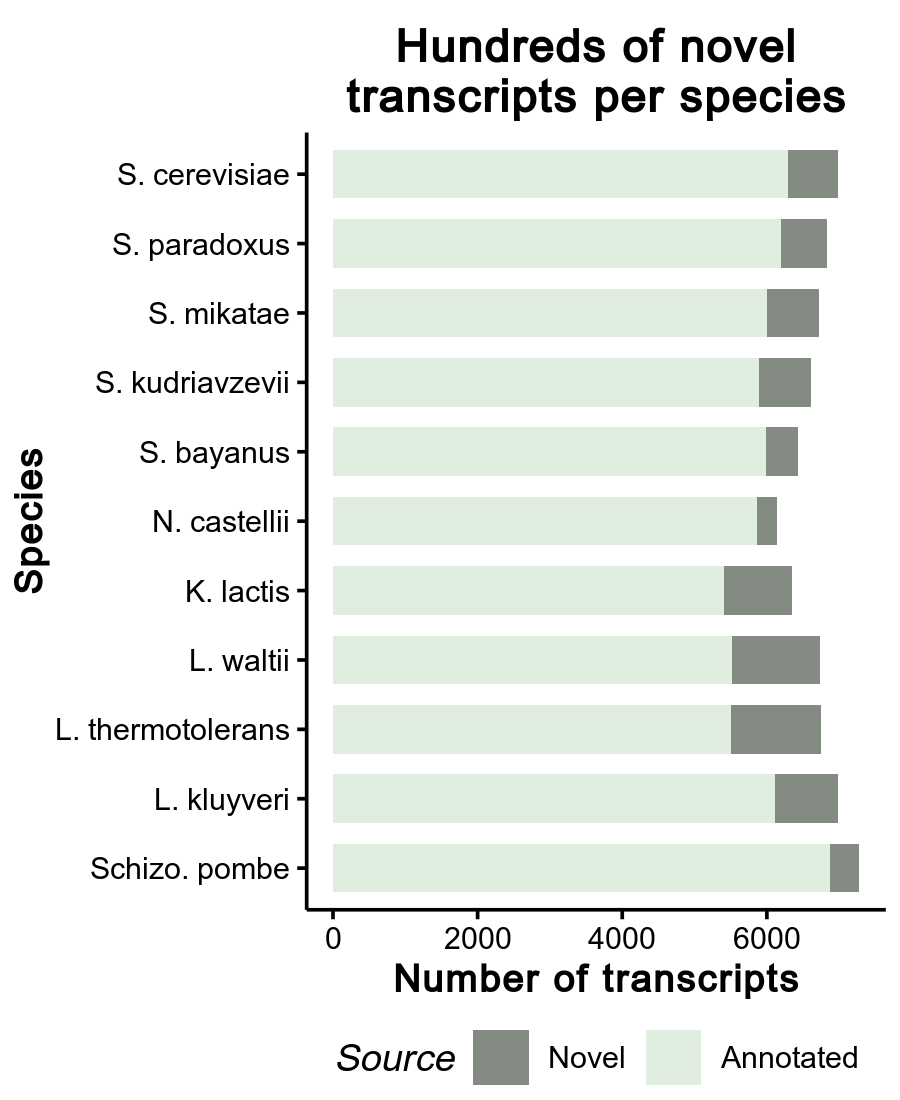

In [38]:
%%R -w 900 -h 1100 -u px

show(Blevins_etal_supplementary$transcripts_per_species)
## plot how many transcripts (annotated vs novel) each species has irrespective of expression level
    transcripts_per_species<-melt(Blevins_etal_supplementary$transcripts_per_species)
    transcripts_per_species$variable <- factor(transcripts_per_species$variable, levels = c( "Novel","Annotated")) 
    transcripts_per_species$Species <- factor(transcripts_per_species$Species, levels = c( "S. cerevisiae","S. paradoxus", "S. mikatae","S. kudriavzevii", "S. bayanus", "N. castellii", "K. lactis", "L. waltii","L. thermotolerans","L. kluyveri","Schizo. pombe")) 



number_of_transcripts_per_species_plot<-ggplot(transcripts_per_species, aes(x=Species,y=value)) +     
    labs(list(title = "Hundreds of novel\ntranscripts per species", y = "Number of transcripts", x = "Species",fill="Source"))+
    geom_col(aes(fill=variable,width=0.7))+
    coord_flip() +
    scale_x_discrete(limits = rev(levels(transcripts_per_species$Species)))+
    scale_fill_manual(values = c("honeydew4","honeydew2"))+
    NULL
number_of_transcripts_per_species_plot+theme_Publication()




## 1d

     Source Translated Number_of_transcripts
1 Annotated        Yes                  5900
2     Novel        Yes                   236
3 Annotated         No                   390
4     Novel         No                   461


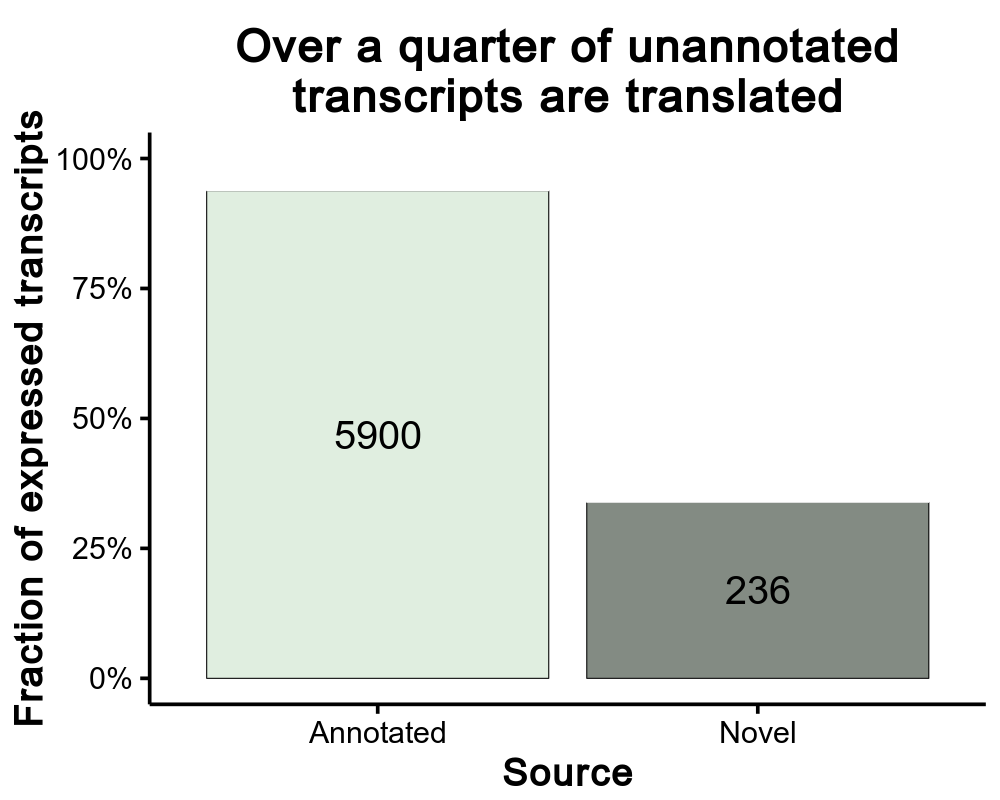

In [39]:
%%R -w 1000 -h 800 -u px

Blevins_etal_dataset$complete_transcriptome['Translated']<-ifelse(Blevins_etal_dataset$complete_transcriptome$translated_in_condition_0_7!='neither','Yes','No')
    Blevins_etal_dataset$complete_transcriptome$Translated<-factor(Blevins_etal_dataset$complete_transcriptome$Translated,c('Yes','No'))

    #we also include annotated CDSs in our analysis
Blevins_etal_dataset$complete_transcriptome['Translated_including_CDSs']<-Blevins_etal_dataset$complete_transcriptome$Translated
    Blevins_etal_dataset$complete_transcriptome$Translated_including_CDSs[grepl('_CDS',Blevins_etal_dataset$complete_transcriptome$Name)]<-'Yes'

fraction_of_translated_transcripts_vs_source_table <- as.data.frame(table(Blevins_etal_dataset$complete_transcriptome$Source,Blevins_etal_dataset$complete_transcriptome$Translated_including_CDSs,useNA ='no'))
    names(fraction_of_translated_transcripts_vs_source_table) <- c("Source","Translated","Number_of_transcripts")
    fraction_of_translated_transcripts_vs_source_table$Translated<-factor(fraction_of_translated_transcripts_vs_source_table$Translated,c("No","Yes"))
show(fraction_of_translated_transcripts_vs_source_table)
s_cere_conservation_fraction_Translated<-ggplot(fraction_of_translated_transcripts_vs_source_table, aes(Source,Number_of_transcripts,fill=Translated,label = ifelse(Translated=="No", "", Number_of_transcripts))) +     
    labs(list(title = "Over a quarter of unannotated\ntranscripts are translated", x = "Source", y = "Fraction of expressed transcripts",fill="Translated"))+
    scale_y_continuous(labels = percent_format())+
    geom_bar(color=c("black",'white',"black",'white'),position = "fill",stat = "identity", fill=c("honeydew2",'white', "honeydew4",'white'))+
    geom_text(size = 14, position = position_fill(vjust = 0.5))
    NULL
s_cere_conservation_fraction_Translated+theme_Publication()


## 1e

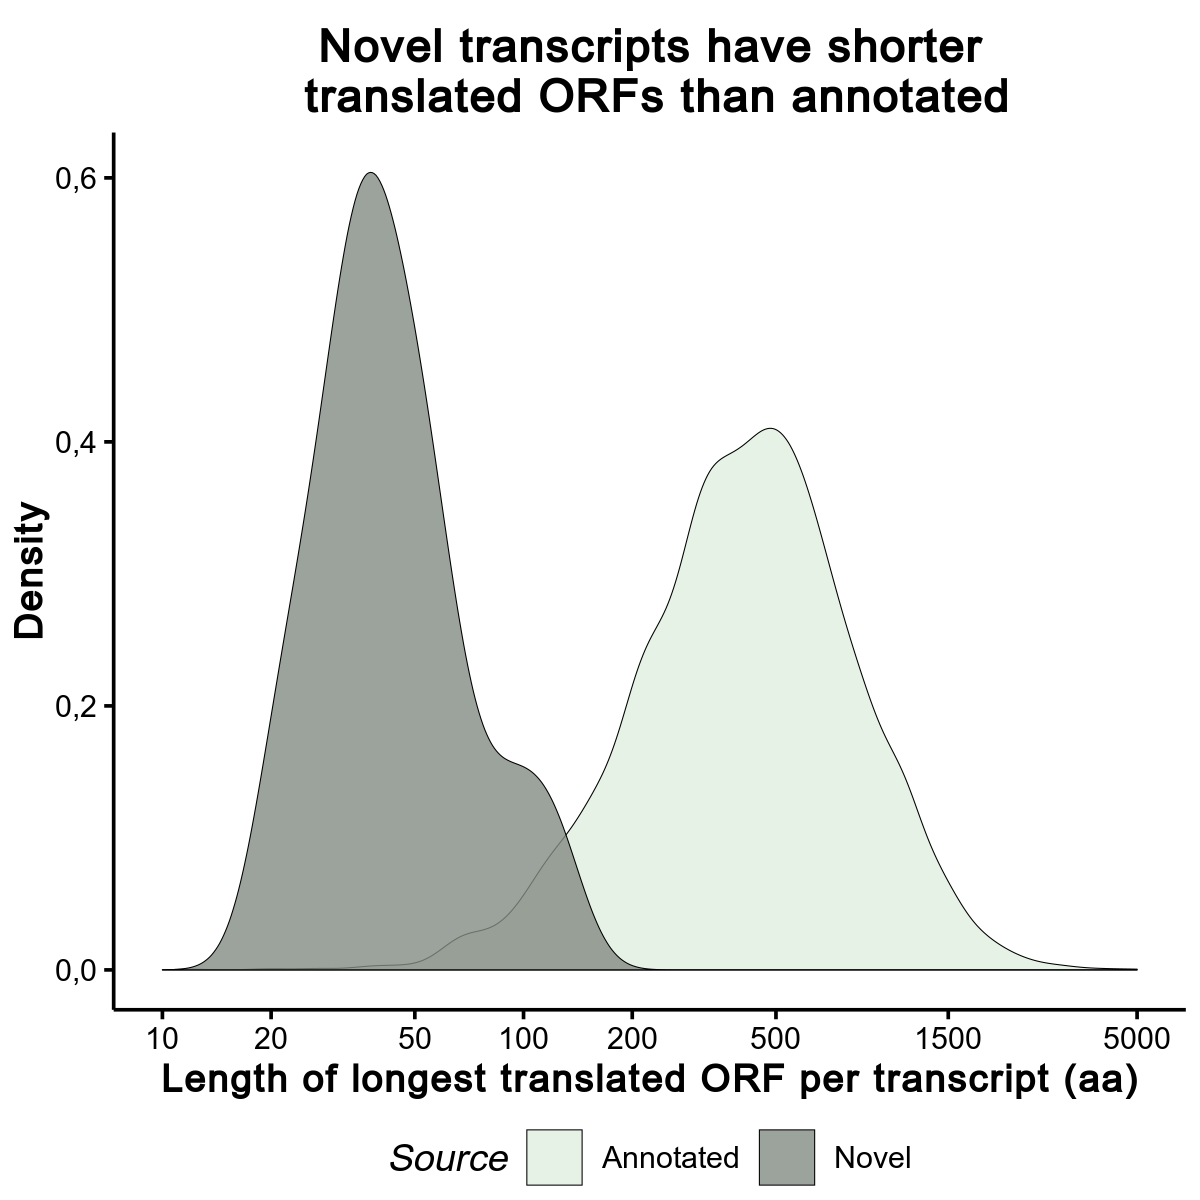

In [40]:
%%R -w 1200 -h 1200 -u px
  

Blevins_etal_dataset$complete_transcriptome<-Blevins_etal_dataset$complete_transcriptome %>% separate(longest_translated_ORF_loc_normal, c("longest_translated_ORF_loc_normal_start", "longest_translated_ORF_loc_normal_end"), convert=TRUE,remove = FALSE) %>%
    separate(longest_translated_ORF_loc_stress, c("longest_translated_ORF_loc_stress_start", "longest_translated_ORF_loc_stress_end"), convert=TRUE,remove = FALSE)
    Blevins_etal_dataset$complete_transcriptome['longest_ORF_length_normal']<-Blevins_etal_dataset$complete_transcriptome$longest_translated_ORF_loc_normal_end-Blevins_etal_dataset$complete_transcriptome$longest_translated_ORF_loc_normal_start
    Blevins_etal_dataset$complete_transcriptome['longest_ORF_length_stress']<-Blevins_etal_dataset$complete_transcriptome$longest_translated_ORF_loc_stress_end-Blevins_etal_dataset$complete_transcriptome$longest_translated_ORF_loc_stress_start
    Blevins_etal_dataset$complete_transcriptome$longest_translated_ORF_of_both_conditions<-ifelse(Blevins_etal_dataset$complete_transcriptome$longest_ORF_length_normal>Blevins_etal_dataset$complete_transcriptome$longest_ORF_length_stress,Blevins_etal_dataset$complete_transcriptome$longest_ORF_length_normal,Blevins_etal_dataset$complete_transcriptome$longest_ORF_length_stress)
    Blevins_etal_dataset$complete_transcriptome$Source <- ifelse(grepl("TCONS_novel", Blevins_etal_dataset$complete_transcriptome$Name), "Novel", "Annotated")

all_coding_transcripts<-subset(Blevins_etal_dataset$complete_transcriptome,Blevins_etal_dataset$complete_transcriptome$Translated_including_CDSs=='Yes' & !is.na(Blevins_etal_dataset$complete_transcriptome$conservation_level) & Blevins_etal_dataset$complete_transcriptome$conservation_level!='NA' )
    all_coding_transcripts$conservation_level[!is.na(all_coding_transcripts$conservation_level)]
    all_coding_transcripts$conservation_level <- factor(all_coding_transcripts$conservation_level, levels = c("Conserved", "Genus specific","De novo"))

cere_longest_translated_ORFs_density<-ggplot(all_coding_transcripts,aes(x=longest_translated_ORF_of_both_conditions/3,fill=Source))+
    geom_density(aes(),alpha=0.8)+
    labs(list(title="Novel transcripts have shorter\n translated ORFs than annotated",y = "Density", x = "Length of longest translated ORF per transcript (aa)"))+
    scale_x_continuous(trans='log2', breaks=c(10,20,50,100,200,500,1500,5000), limits=c(10,5000))+
    scale_y_continuous()+
    scale_fill_manual(values=c("honeydew2","honeydew4"))+
    NULL
cere_longest_translated_ORFs_density+theme_Publication()

In [41]:
%%R
# test if the two distributions of lengths are significantly different
print("Are the two distributions of lengths (longest translated ORF per transcript) significantly different?")
wilcox.test(subset(all_coding_transcripts, all_coding_transcripts$Source=="Annotated")$longest_translated_ORF_of_both_conditions, subset(all_coding_transcripts, all_coding_transcripts$Source=="Novel")$longest_translated_ORF_of_both_conditions, paired=FALSE) 

[1] "Are the two distributions of lengths (longest translated ORF per transcript) significantly different?"

	Wilcoxon rank sum test with continuity correction

data:  subset(all_coding_transcripts, all_coding_transcripts$Source ==  and subset(all_coding_transcripts, all_coding_transcripts$Source ==     "Annotated")$longest_translated_ORF_of_both_conditions and     "Novel")$longest_translated_ORF_of_both_conditions
W = 188260, p-value < 2,2e-16
alternative hypothesis: true location shift is not equal to 0



In [42]:
%%R
print("The median length of the longest ORF for each novel transcript is: (aa)")
median(subset(all_coding_transcripts, all_coding_transcripts$Source=="Novel")$longest_translated_ORF_of_both_conditions,na.rm=TRUE)/3

[1] "The median length of the longest ORF for each novel transcript is: (aa)"
[1] 40


In [43]:
%%R
print("The median length of the longest ORF for each annotated transcript is: (aa)")
median(subset(all_coding_transcripts, all_coding_transcripts$Source=="Annotated")$longest_translated_ORF_of_both_conditions,na.rm=TRUE)/3

[1] "The median length of the longest ORF for each annotated transcript is: (aa)"
[1] 422


## 1f

In [44]:
%%R
# make a non-redundant list of all translated ORFs per transcript 
only_novel_coding_transcripts<-subset(Blevins_etal_dataset$complete_transcriptome,Blevins_etal_dataset$complete_transcriptome$Source=='Novel')

    temp<-toString(factor(only_novel_coding_transcripts$all_translated_ORFs_normal))
    temp<-paste(temp,toString(factor(only_novel_coding_transcripts$all_translated_ORFs_stress)))
    temp<-gsub("\\[|\\]|'|\\s","",temp)
    temp=strsplit(temp,",")
    temp<-unlist(temp)
    temp<-unique(temp)
df<-data.frame("unique_coding_ORFs"=temp)
df<-df %>% separate(unique_coding_ORFs,sep="-",c("transcript_ID", "orfnum"))
df$transcript_ID[!is.na(df$transcript_ID)]
translated_ORF_counts<-as.data.frame(df %>% count(transcript_ID))
#remove NA rows
translated_ORF_counts = translated_ORF_counts[-1,]
translated_ORF_counts = translated_ORF_counts[-1,]



In [45]:
%%R

table(translated_ORF_counts$n)


  1   2   3   4 
163  50  19   4 


In [46]:
%%R
print("Number of NOVEL transcripts with exactly ONE translated ORF (including both normal & stress conditions):")
nrow(subset(translated_ORF_counts,translated_ORF_counts$n==1))

[1] "Number of NOVEL transcripts with exactly ONE translated ORF (including both normal & stress conditions):"
[1] 163


In [47]:
%%R
print("Number of NOVEL transcripts with exactly TWO translated ORFs (including both normal & stress conditions):")
nrow(subset(translated_ORF_counts,translated_ORF_counts$n==2))

[1] "Number of NOVEL transcripts with exactly TWO translated ORFs (including both normal & stress conditions):"
[1] 50


In [48]:
%%R
print("Number of NOVEL transcripts with THREE OR MORE translated ORFs (including both normal & stress conditions):")
nrow(subset(translated_ORF_counts,translated_ORF_counts$n>=3))

[1] "Number of NOVEL transcripts with THREE OR MORE translated ORFs (including both normal & stress conditions):"
[1] 23


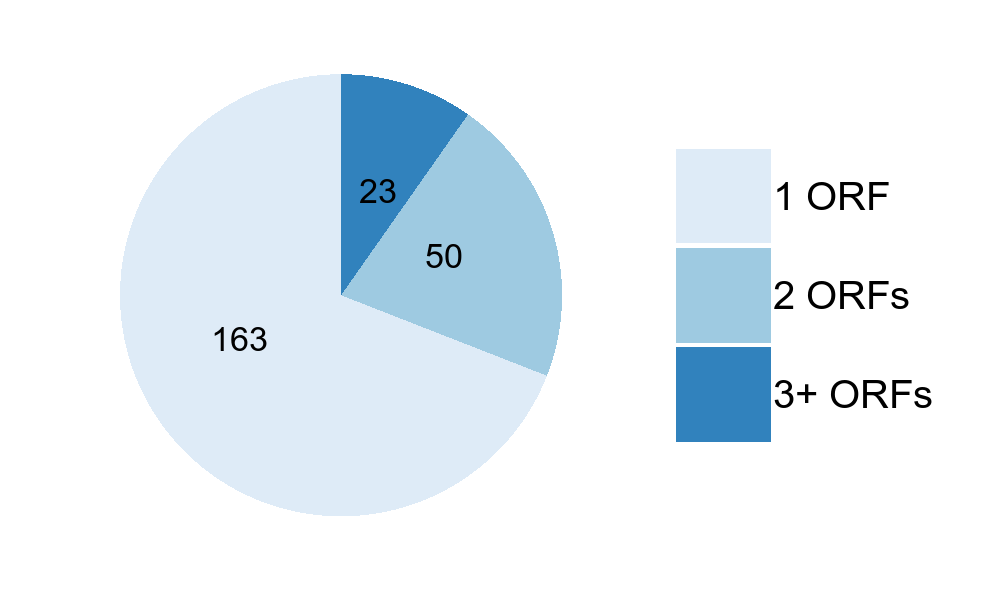

In [49]:
%%R -w 1000 -h 600 -u px

novel_coding_ORF_count <- data.frame(
  group = c("1 ORF", "2 ORFs", "3+ ORFs"),
  value = c(163, 50, 23))


novel_orf_count_pie<- ggplot(novel_coding_ORF_count, aes(x="", y=value, fill=group))+
    geom_bar(width = 1, stat = "identity")+
    scale_fill_brewer(palette = "Blues") + 
    coord_polar("y", start=0) +
    guides(fill = guide_legend(override.aes = list(size=35)))+
    geom_text(aes(y = value-sum(novel_coding_ORF_count$value)/value,label = value), size=12)
    NULL
novel_orf_count_pie+theme_Blank()+theme(axis.text.x=element_blank(),legend.title = element_blank(),legend.text = element_text(size = 40))

**There were 697 Novel transcripts identified in S. cerevisiae. 236 (163+50+23) of these Novel transcripts have at least one translated ORF, and 461 Novel transcripts had no evidence of any translated ORFs.**

# Figure 2



## 2a

<img src="photos_and_figures/new_figure_2a.png">

## 2b

<img src="photos_and_figures/new_figure_2b.png">

## 2c

<img src="photos_and_figures/new_figure_2c.png">

## 2d

<img src="photos_and_figures/new_figure_2d.png">

In [50]:
%%R
Blevins_etal_dataset$complete_transcriptome$conservation_level<- factor(Blevins_etal_dataset$complete_transcriptome$conservation_level, levels = c( "Conserved","Genus specific","De novo"))
Blevins_etal_dataset$complete_transcriptome$expressed_in_condition_15_15<- factor(Blevins_etal_dataset$complete_transcriptome$expressed_in_condition_15_15, levels = c( "normal","stress","both"))
table(subset(Blevins_etal_dataset$complete_transcriptome,Blevins_etal_dataset$complete_transcriptome$expressed_in_condition_15_15!='neither')$conservation_level)


     Conserved Genus specific        De novo 
          4409            251            213 


## 2e

  Conservation_level Expressed_in_condition Number_of_transcripts
1          Conserved                 normal                  1094
2     Genus specific                 normal                    76
3            De novo                 normal                    92
4          Conserved                 stress                   108
5     Genus specific                 stress                    20
6            De novo                 stress                    13
7          Conserved                   both                  3207
8     Genus specific                   both                   155
9            De novo                   both                   108


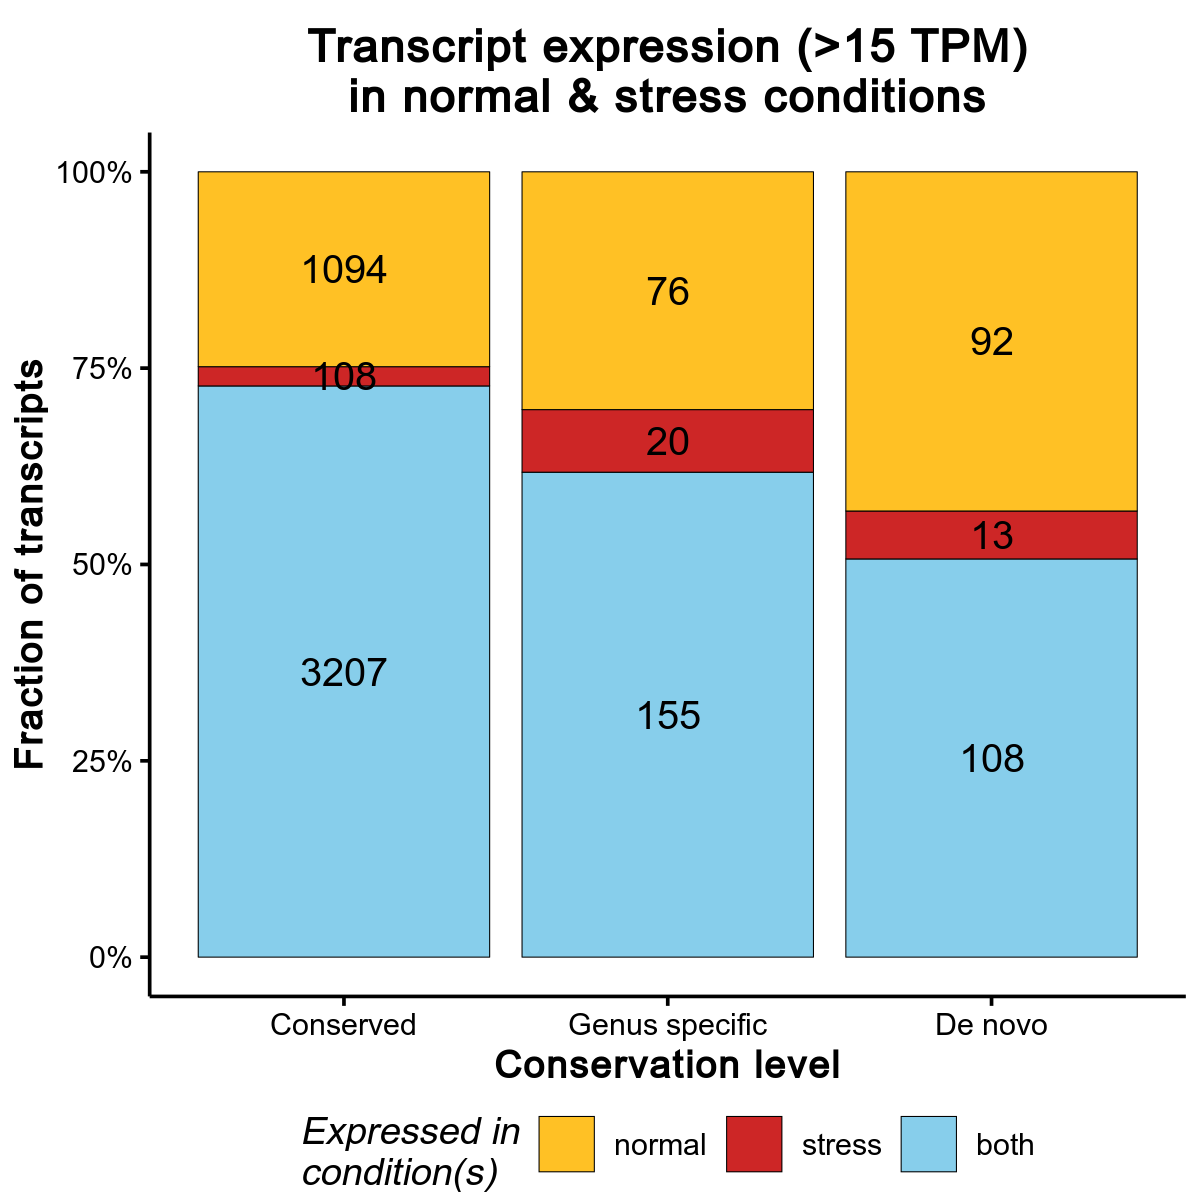

In [51]:
%%R -w 1200 -h 1200 -u px

table_condition_by_conservation_level <- as.data.frame(table(subset(Blevins_etal_dataset$complete_transcriptome,Blevins_etal_dataset$complete_transcriptome$expressed_in_condition_15_15!='neither')$conservation_level,subset(Blevins_etal_dataset$complete_transcriptome,Blevins_etal_dataset$complete_transcriptome$expressed_in_condition_15_15!='neither')$expressed_in_condition_15_15))
    names(table_condition_by_conservation_level) <- c("Conservation_level","Expressed_in_condition","Number_of_transcripts")
    show(table_condition_by_conservation_level)

expression_by_condition<-ggplot(table_condition_by_conservation_level, aes(Conservation_level,Number_of_transcripts,  fill=Expressed_in_condition,label=Number_of_transcripts)) +     
    labs(list(title = "Transcript expression (>15 TPM)\nin normal & stress conditions", x = "Conservation level", y = "Fraction of transcripts",fill="Expressed in\ncondition(s)"))+
    geom_bar(position = "fill",stat = "identity",colour="black")+
    scale_fill_manual(values = c('goldenrod1','firebrick3','skyblue'))+
    scale_y_continuous(labels = percent_format())+
    geom_text(size = 14, position = position_fill(vjust = 0.5))
    NULL
expression_by_condition+theme_Publication()

  Conservation_level    Source Number_of_transcripts
1          Conserved Annotated                  4306
2     Genus specific Annotated                   130
3            De novo Annotated                    52
4          Conserved     Novel                   103
5     Genus specific     Novel                   121
6            De novo     Novel                   161


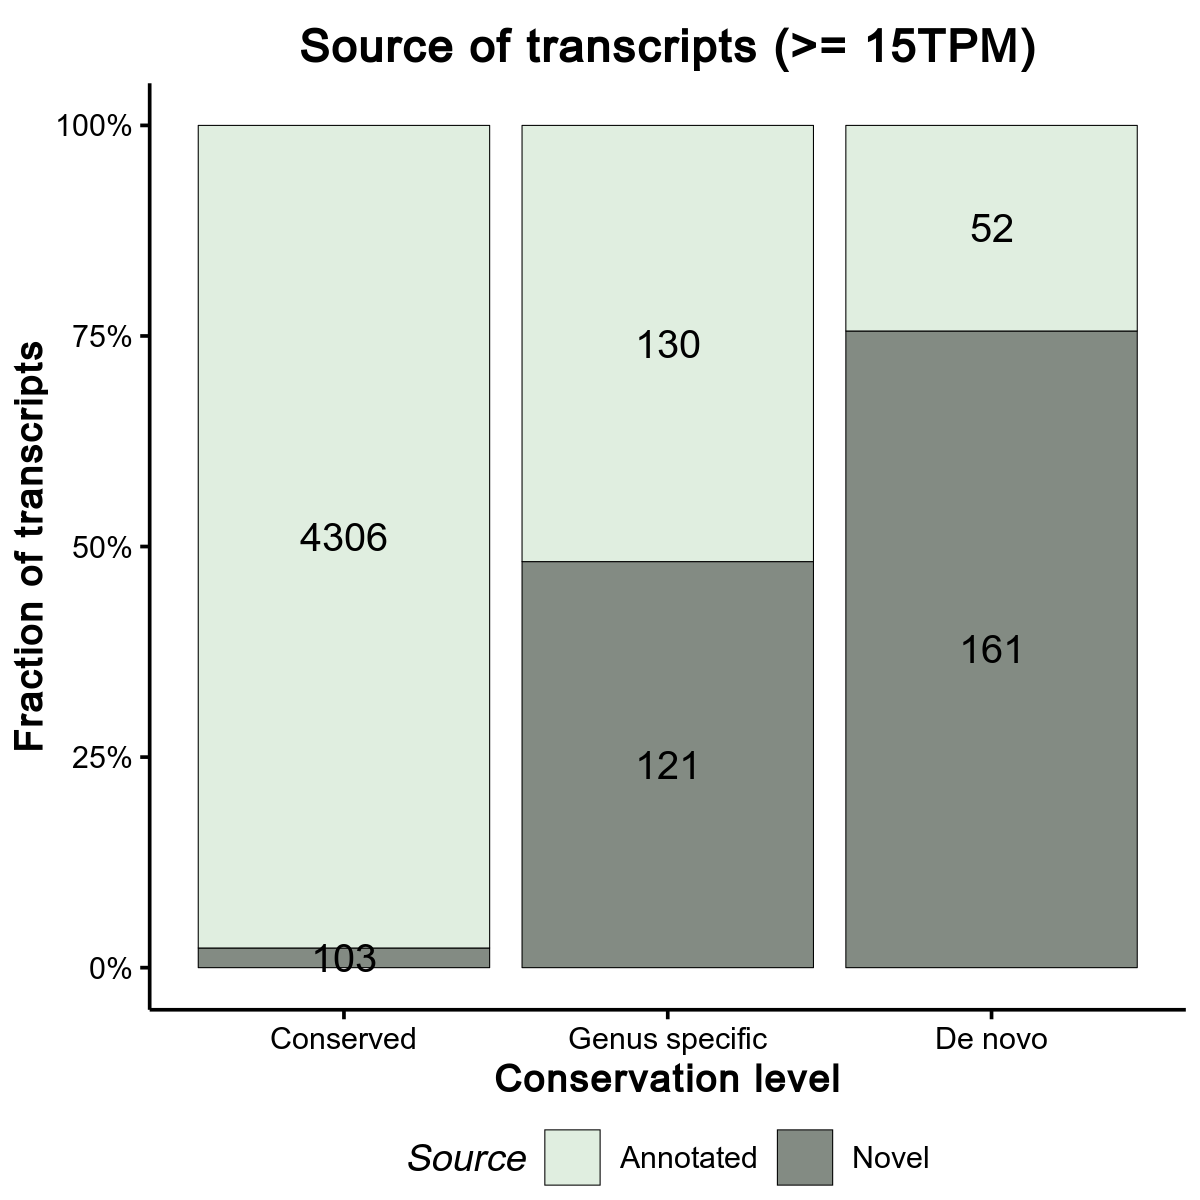

In [52]:
%%R -w 1200 -h 1200 -u px

table_source_by_conservation_level <- as.data.frame(table(subset(Blevins_etal_dataset$complete_transcriptome,Blevins_etal_dataset$complete_transcriptome$expressed_in_condition_15_15!='neither')$conservation_level,subset(Blevins_etal_dataset$complete_transcriptome,Blevins_etal_dataset$complete_transcriptome$expressed_in_condition_15_15!='neither')$Source))
    names(table_source_by_conservation_level) <- c("Conservation_level","Source","Number_of_transcripts")
    show(table_source_by_conservation_level)

expression_by_source<-ggplot(table_source_by_conservation_level, aes(Conservation_level,Number_of_transcripts,fill=Source,label=Number_of_transcripts)) +     
    labs(list(title = "Source of transcripts (>= 15TPM)", x = "Conservation level", y = "Fraction of transcripts",fill="Source"))+
    geom_bar(position = "fill",stat = "identity",colour="black")+
    scale_fill_manual(values=c("honeydew2","honeydew4"))+
    scale_y_continuous(labels = percent_format())+
    geom_text(size = 14, position = position_fill(vjust = 0.5))
    NULL
    
expression_by_source + theme_Publication()

# Figure 3



## 3a

<img src="photos_and_figures/new_figure_3a.png">

## 3b

NULL


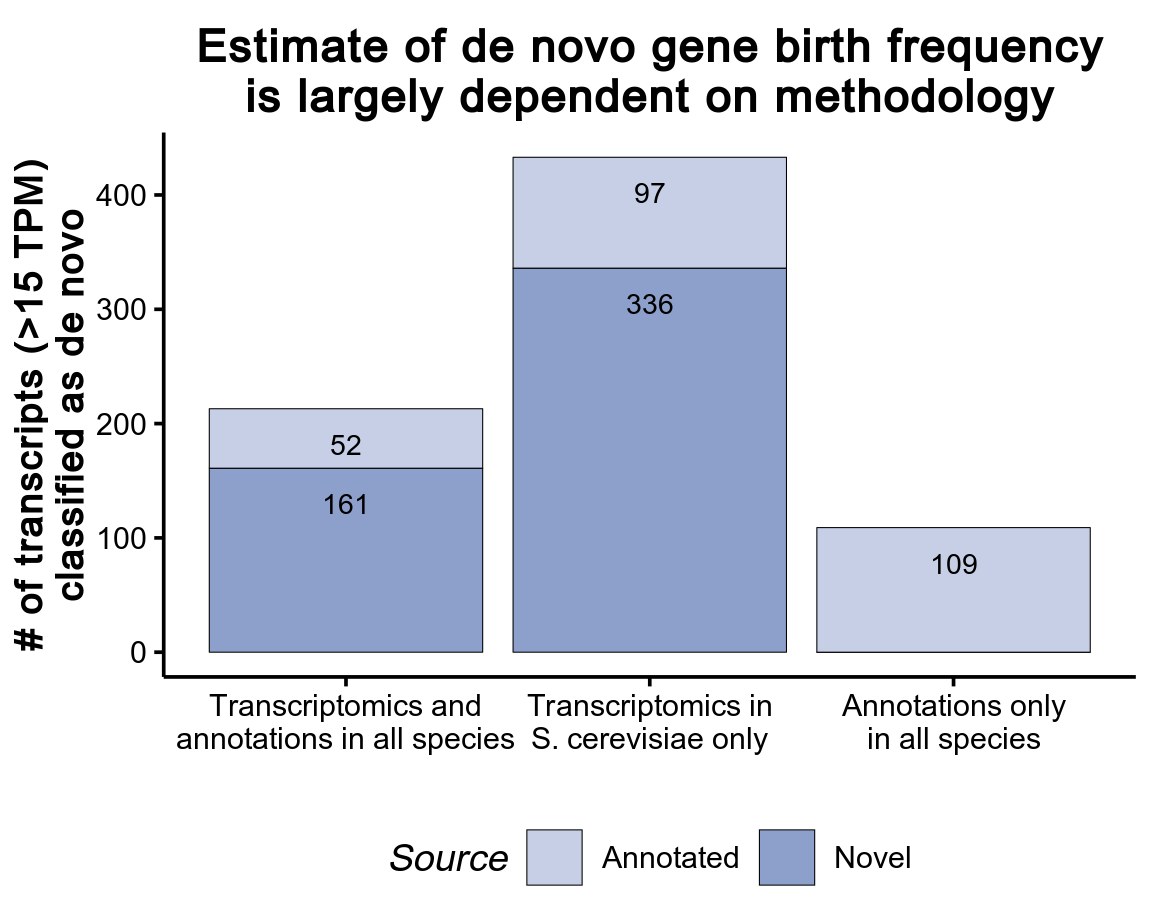

In [53]:
%%R -w 1150 -h 900 -u px

different_approaches_only_DN<-subset(Blevins_etal_supplementary$comparing_methodologies,Conservation_level=="De novo")

show(different_approaches_only_DN$comparing_methodologies)
    different_approaches_only_DN$Conservation_level <- factor(different_approaches_only_DN$Conservation_level, levels = c("Conserved", "Genus specific","De novo"))
    different_approaches_only_DN$Source <- factor(different_approaches_only_DN$Source, levels = c("Annotated","Novel"))
    different_approaches_only_DN$Approach <- factor(different_approaches_only_DN$Approach, levels = c("Transcriptomics and annotations in all species","Transcriptomics in S. cerevisiae only" ,"Annotations only in all species"))
    levels(different_approaches_only_DN$Approach) <- gsub("s only ", "s only\n", levels(different_approaches_only_DN$Approach))
    levels(different_approaches_only_DN$Approach) <- gsub("ics in ", "ics in\n", levels(different_approaches_only_DN$Approach))
    levels(different_approaches_only_DN$Approach) <- gsub("and a", "and\na", levels(different_approaches_only_DN$Approach))


different_approaches_barplot_only_DN<-ggplot(different_approaches_only_DN, aes(x=Approach,y=Number_of_transcripts_over_15_TPM,fill=Source,position_stack(reverse = TRUE),label=Number_of_transcripts_over_15_TPM)) +     
    labs(list(title = "Estimate of de novo gene birth frequency\nis largely dependent on methodology", x = "", y = "# of transcripts (>15 TPM)\nclassified as de novo", fill="Source"))+
    geom_bar(colour="black",position = "stack",stat = "identity")+
    scale_fill_manual(values=c("#c6cfe5","#8DA0CB","#c6cfe5","#8DA0CB","#c6cfe5"))+
    geom_text(size = 10, position = "stack",vjust=2.3)+
    NULL
different_approaches_barplot_only_DN+theme_Publication()


## 3c Identification of annotated S. cerevisiae-specific genes across different studies 

[Carvunis et al. (2012) "Proto-genes and de novo gene birth"](http://www.ncbi.nlm.nih.gov/pubmed/22722833)
**(Table S3)**

YAL069W; YAL066W; YAL056C-A; YAL037C-A; YAL031W-A; YAR030C; YAR035C-A; YAR053W; YBL100C; YBL053W; YBR072C-A; YBR116C; YBR174C; YBR182C-A; YBR196C-B; YBR200W-A; YBR232C; YBR296C-A; YCL046W; YCR095W-A; YCR108C; YDL096C; YDL062W; YDL034W; YDL023C; YDL016C; YDL009C; YDR008C; YDR010C; YDR118W-A; YDR187C; YDR193W; YDR203W; YDR230W; YDR327W; YDR360W; YDR467C; YDR521W; YDR537C; YEL074W; YEL030C-A; YEL010W; YEL009C-A; YER046W-A; YER079C-A; YER087C-A; YER133W-A; YER135C; YER137W-A; YER152W-A; YER158W-A; YFL015W-A; YFL013W-A; YGL218W; YGL214W; YGL152C; YGL132W; YGR121W-A; YGR290W; YHL048C-A; YHL046W-A; YHL030W-A; YHL015W-A; YHR028W-A; YHR180W-A; YIL115W-A; YIL100W; YIL071W-A; YIL068W-A; YIL066W-A; YIL030W-A; YIR020C-B; YIR036W-A; YJR020W; YJR023C; YJR114W; YJR151W-A; YJR157W; YKL177W; YKL153W; YKL136W; YKL131W; YKL096C-B; YKL053W; YKL030W; YKR040C; YLL047W; YLR156W; YLR157W-D; YLR157W-E; YLR159W; YLR161W; YLR171W; YLR232W; YLR322W; YLR358C; YLR466C-B; YML099W-A; YMR153C-A; YMR172C-A; YMR175W-A; YMR193C-A; YMR294W-A; YMR306C-A; YMR315W-A; YMR316C-B; YNL319W; YNL114C; YNL109W; YNL105W; YNL013C; YNR005C; YOL166C; YOL164W-A; YOL155W-A; YOL150C; YOL037C; YOR008C-A; YOR011W-A; YOR041C; YOR055W; YOR121C; YOR135C; YOR161C-C; YOR333C; YOR392W; YOR394C-A; YPL251W; YPL038W-A; YPR087W; YPR126C; YPR150W;YBR076C-A; YGR011W; YGR137W; YGR174W-A; YLL020C; YML116W-A; YMR119W-A; YMR173W-A; YMR244C-A; YOL038C-A; YPL152W-A


[TC Lu et al. (2017) "A comprehensive analysis of transcript-supported de novo genes in Saccharomyces sensu stricto yeasts"](https://pubmed.ncbi.nlm.nih.gov/28981695/)
**(Table 1- only age0 genes with canonical names)**

YJL077W-B; YJL077C; YKL053W; YKL036C; YLR041W; YLR112W; YLR123C; YLR255C; YLR415C; YLR434C; YML122C; YML089C; YMR007W; YMR052C-A; YMR122C; YMR151W; YMR153C-A; YMR194C-A; YNL277W-A; YNL146C-A; YOL118C; YOR015W; YOR032W-A; YOR248W; YOR293C-A; YOR316C-A; YPL056C; YBL100W-C; YBL071C; YBR109W-A; YCL042W; YCR024C-B; YCR085W; YDR024W; YDR426C; YER076W-A; YER175W-A; YGL204C; YGL165C; YHR022C-A; YHR071C-A; YHR130C; YHR173C; YIL141W; YIL086C; YIL066W-A; YIL028W

[Vakirlis et al. (2018) "A molecular portrait of de novo genes in yeast"](https://pubmed.ncbi.nlm.nih.gov/29220506/)
**(Table S4)**

YAL064W-B; YAR068W; YBL044W; YBL065W; YBR032W; YBR063C; YBR090C; YBR109W-A; YBR113W; YBR184W; YBR190W; YBR298C-A; YCL021W-A; YCL056C; YCL058C; YDL007C-A; YDL069C; YDL241W; YDR010C; YDR215C; YDR281C; YEL057C; YEL068C; YER084W; YER119C-A; YER121W; YER188W; YFL012W; YFR026C; YFR035C; YGL015C; YGL230C; YGR035C; YGR050C; YGR161W-C; YGR291C; YHL045W; YHR021W-A; YHR093W; YHR157W; YHR180W; YHR213W-A; YHR214W-A; YIL012W; YIL014C-A; YIL028W; YIL029C; YIL058W; YIL059C; YIL089W; YIL100W; YIL102C; YIL134C-A; YIR020W-A; YJL215C; YJR038C; YJR108W; YKL031W; YLL030C; YLR036C; YLR042C; YLR053C; YLR062C; YLR082C; YLR111W; YLR124W; YLR140W; YLR236C; YLR346C; YLR374C; YLR402W; YLR412C-A; YML053C; YML054C-A; YML058W-A; YMR103C; YMR194C-A; YMR324C; YNL046W; YNL269W; YNR001W-A; YOL014W; YOL019W-A; YOL085C; YOL159C-A; YOR032W-A; YOR284W; YOR318C; YOR376W; YOR381W-A; YPL025C; YPL027W; YPL200W; YPL257W; YPR071W; YPR145C-A; YPR170C; YPR195C
<br>*Non-canonical names: Scer_1.139; Scer_15.642; Scer_16.7; Scer_3.7; Scer_4.231; Scer_7.225; Scer_7.45*


[Wu and Knudson (2018) "Tracing the De Novo Origin of Protein-Coding Genes in Yeast"](https://pubmed.ncbi.nlm.nih.gov/30065088/)
**(Table S1)**

YAL026C-A; YAL031W-A; YAL045C; YAL047W-A; YAL059C-A; YBL083C; YBR056C-B; YBR206W; YCL058C; YCR087W; YDL016C; YDL041W; YDL086C-A; YDL158C; YDR154C; YDR327W; YDR396W; YDR413C; YDR426C; YEL018C-A; YEL020C-B; YER023C-A; YER046W-A; YER087C-A; YER133W-A; YGL152C; YGL199C; YGL214W; YGR011W; YGR031C-A; YGR064W; YGR137W; YGR151C; YGR259C; YHL006W-A; YHL019W-A; YHR056W-A; YHR180W-A; YIL047C-A; YIL071W-A; YJL064W; YJL067W; YJL211C; YJR018W; YJR020W; YJR087W; YJR140W-A; YKL036C; YKL053W; YKL076C; YKL136W; YKL153W; YKL169C; YKR035C; YLL020C; YLL044W; YLR041W; YLR062C; YLR101C; YLR171W; YLR198C; YLR217W; YLR235C; YLR317W; YLR444C; YML009C-A; YML012C-A; YML101C-A; YMR153C-A; YMR173W-A; YMR307C-A; YNL089C; YNL150W; YNL226W; YNL228W; YNL266W; YNL276C; YOL013W-A; YOL050C; YOR333C; YPR126C; YPR150W; YPR160C-A; YPR170W-A


**From this study (S. cerevisiae specific)**

YAL037C-A; YAL064W; YBL101W-C; YBR072C-A; YBR182C-A; YBR200W-A; YBR296C-A; YBR298C-A; YCL054W-A; YCR050C; YDL009C; YDR169C-A; YDR194W-A; YER014C-A; YER190C-B; YFL010W-A; YFL068W; YGL007C-A; YGL041C-B; YGR031C-A; YGR121W-A; YGR204C-A; YHL015W-A; YHL048C-A; YHR022C-A; YHR214C-D; YHR214C-E; YIR018C-A; YJL077W-B; YJL136W-A; YLL006W-A; YLR156W; YLR157W-A; YLR157W-B; YLR159W; YLR161W; YLR358C; YLR406C-A; YMR105W-A; YMR182W-A; YMR247W-A; YMR272W-B; YMR315W-A; YNL067W-A; YNL130C-A; YNL146C-A; YNL277W-A; YOL038C-A; YOL155W-A; YOL164W-A; YOR008C-A; YOR011W-A; YOR068C; YOR394C-A
<br>*NC genes: gene6336; gene6341; HRA1; IRT1; PWR1; RNA170; RPM1; RUF21; RUF22; RUF23; snR52; snR56; snR79; snR81; ZOD1*



<img src="photos_and_figures/new_figure_3c.png">

# Figure 4



## 4a Lower proportion of de novo transcripts are translated

In [54]:
%%R
print("The number of transcripts which have evidence of translation in our experiments are as follows:")
table(subset(Blevins_etal_dataset$complete_transcriptome,Blevins_etal_dataset$complete_transcriptome$expressed_in_condition_15_15!='neither')$conservation_level,subset(Blevins_etal_dataset$complete_transcriptome,Blevins_etal_dataset$complete_transcriptome$expressed_in_condition_15_15!='neither')$Translated)


[1] "The number of transcripts which have evidence of translation in our experiments are as follows:"
                
                  Yes   No
  Conserved      4270  139
  Genus specific  127  124
  De novo          62  151


In [55]:
%%R
print("However, as some annotated transcripts are known to be coding but weren't translated in our experiments, we will also include these in our comparisons of translated transcripts as we did previously.")

# if the Name field contains 'CDS' then the transcript is annotated as protein-coding.
Blevins_etal_dataset$complete_transcriptome['Translated_including_CDSs']<-Blevins_etal_dataset$complete_transcriptome$Translated
    Blevins_etal_dataset$complete_transcriptome$Translated_including_CDSs[grepl('_CDS',Blevins_etal_dataset$complete_transcriptome$Name)]<-'Yes'
    table(subset(Blevins_etal_dataset$complete_transcriptome,Blevins_etal_dataset$complete_transcriptome$expressed_in_condition_15_15!='neither')$conservation_level,subset(Blevins_etal_dataset$complete_transcriptome,Blevins_etal_dataset$complete_transcriptome$expressed_in_condition_15_15!='neither')$Translated_including_CDSs)


[1] "However, as some annotated transcripts are known to be coding but weren't translated in our experiments, we will also include these in our comparisons of translated transcripts as we did previously."
                
                  Yes   No
  Conserved      4297  112
  Genus specific  147  104
  De novo          97  116


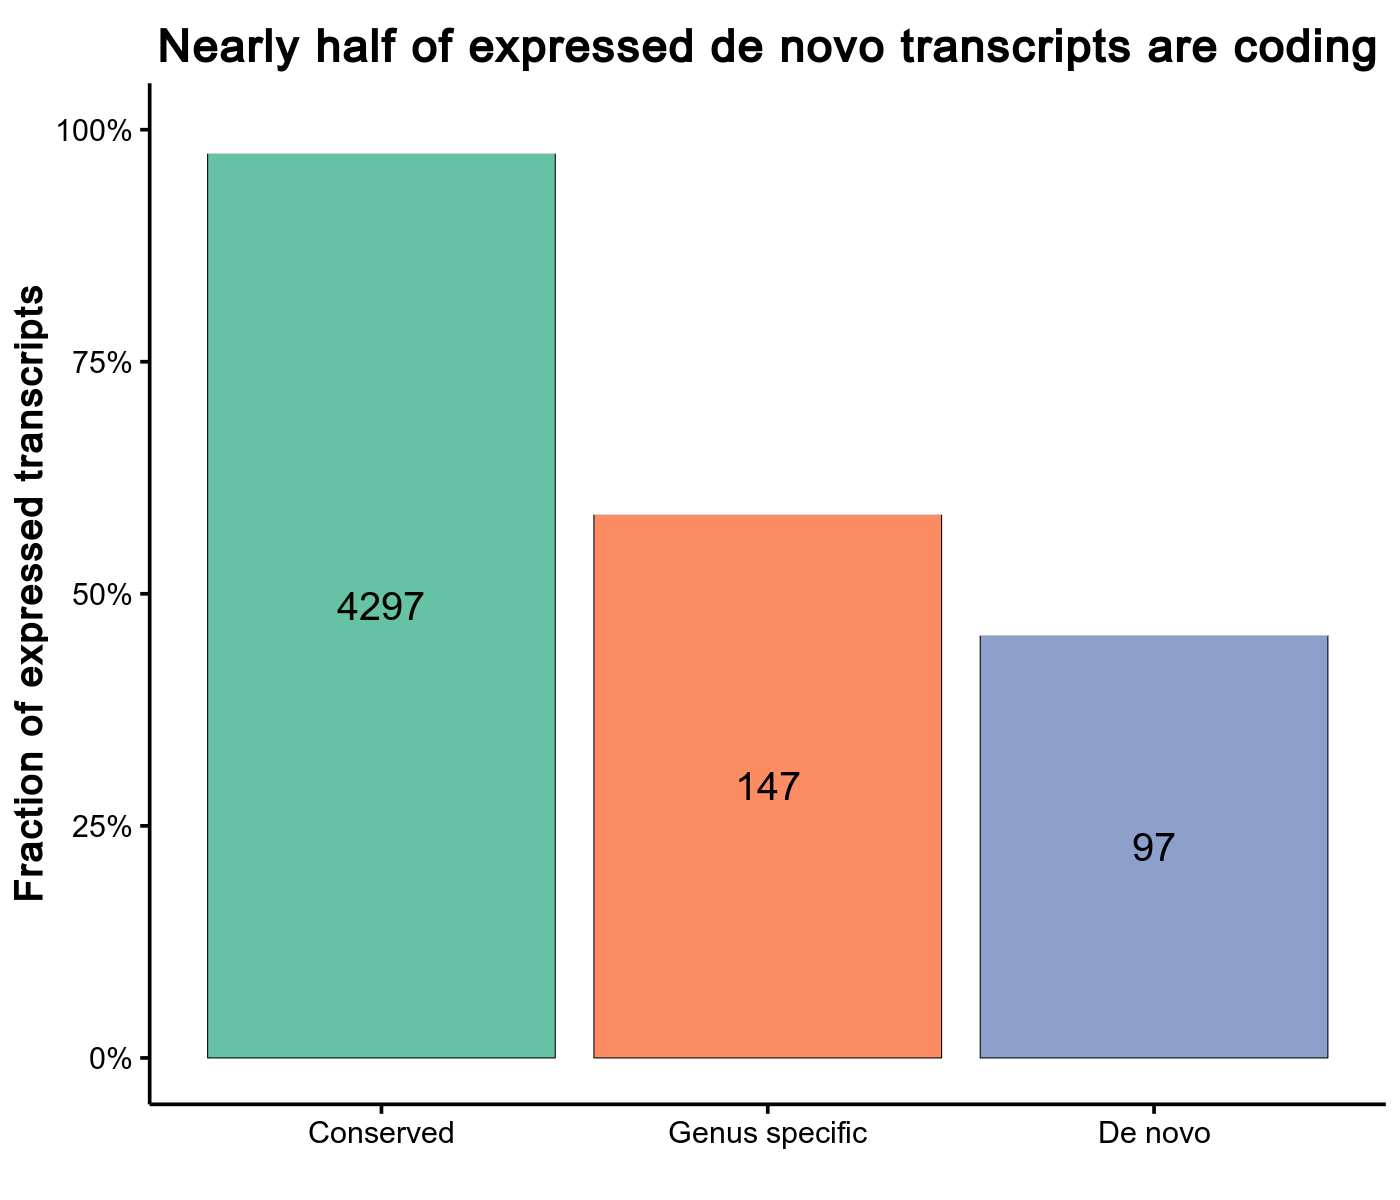

In [56]:
%%R -w 1400 -h 1200 -u px

translated_transcripts_by_conservation_level_table<-as.data.frame(table(subset(Blevins_etal_dataset$complete_transcriptome,Blevins_etal_dataset$complete_transcriptome$expressed_in_condition_15_15!='neither')$conservation_level,subset(Blevins_etal_dataset$complete_transcriptome,Blevins_etal_dataset$complete_transcriptome$expressed_in_condition_15_15!='neither')$Translated_including_CDSs))
    names(translated_transcripts_by_conservation_level_table) <- c("Conservation_level","Translated","Number_of_transcripts")
    translated_transcripts_by_conservation_level_table$Conservation_level <- factor(translated_transcripts_by_conservation_level_table$Conservation_level, levels = c("Conserved", "Genus specific","De novo"))
    translated_transcripts_by_conservation_level_table$Translated <- factor(translated_transcripts_by_conservation_level_table$Translated, levels = c("No","Yes"))

s_cere_conservation_15_fraction_translated<-ggplot(translated_transcripts_by_conservation_level_table, aes(Conservation_level,Number_of_transcripts,fill=Translated,label = ifelse(Translated=="No", "", Number_of_transcripts))) +     
    labs(list(title = "Nearly half of expressed de novo transcripts are coding", x = "", y = "Fraction of expressed transcripts",fill="Translated"))+
    geom_bar(color=c("black",'white',"black",'white',"black",'white'),position = "fill",stat = "identity", fill=c("#66C2A5",'white', "#FC8D62",'white', "#8DA0CB",'white'))+
    scale_y_continuous(labels = percent_format())+
    geom_text(size = 14,position=position_fill(vjust=0.5))+
    NULL
s_cere_conservation_15_fraction_translated + theme_Publication()

## 4b De novo translated ORFs are significantly shorter than conserved translated ORFs

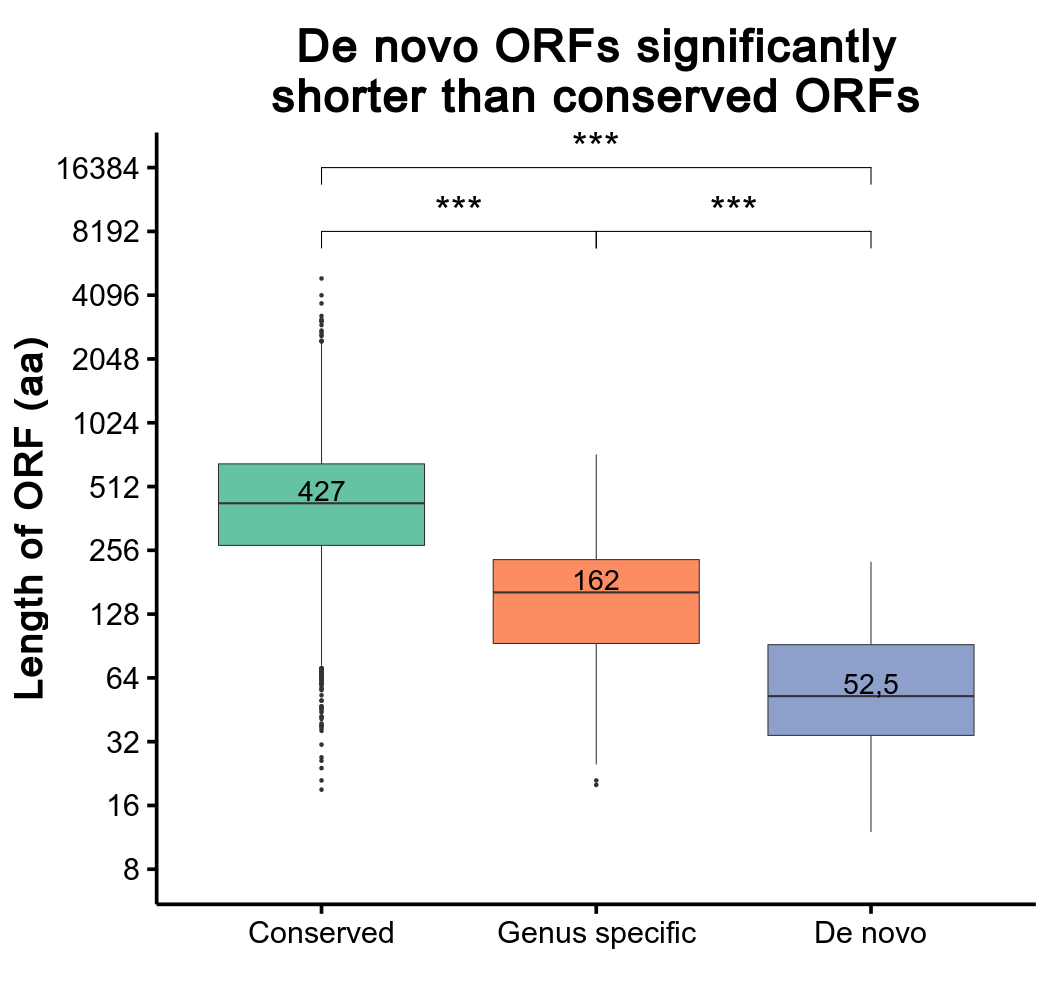

In [57]:
%%R -w 1050 -h 1000 -u px



medians<-all_coding_transcripts %>% group_by(conservation_level) %>% summarise(median = median(longest_translated_ORF_of_both_conditions/3, na.rm = TRUE))

orf_length_boxplot<- ggplot(all_coding_transcripts, aes(x=conservation_level, y=longest_translated_ORF_of_both_conditions/3,fill=conservation_level)) + 
    geom_boxplot(notch=FALSE)+
    geom_signif(comparisons = list(c("De novo", "Genus specific"), c("Genus specific", "Conserved")),map_signif_level = TRUE, textsize=14,y_position=13,)+
    geom_signif(comparisons = list(c("De novo", "Conserved")),y_position=14,map_signif_level = TRUE, textsize=14)+
    scale_fill_brewer(palette="Set2",guide=FALSE)+
    scale_y_continuous(trans="log2",breaks=c(8,16,32,64,128,256,512,1024,2048,4096,8192,16384), limits=c(8, 16384))+
    labs(list(title = "De novo ORFs significantly\nshorter than conserved ORFs", y = "Length of ORF (aa)",fill="",x=""))+
    geom_text(data = medians, aes(x = conservation_level, y = median, label = median), size = 10, vjust = -.1,)
    NULL
orf_length_boxplot + theme_Publication()



## 4c De novo translated ORFs have a lower coding score than more conserved translated ORFs


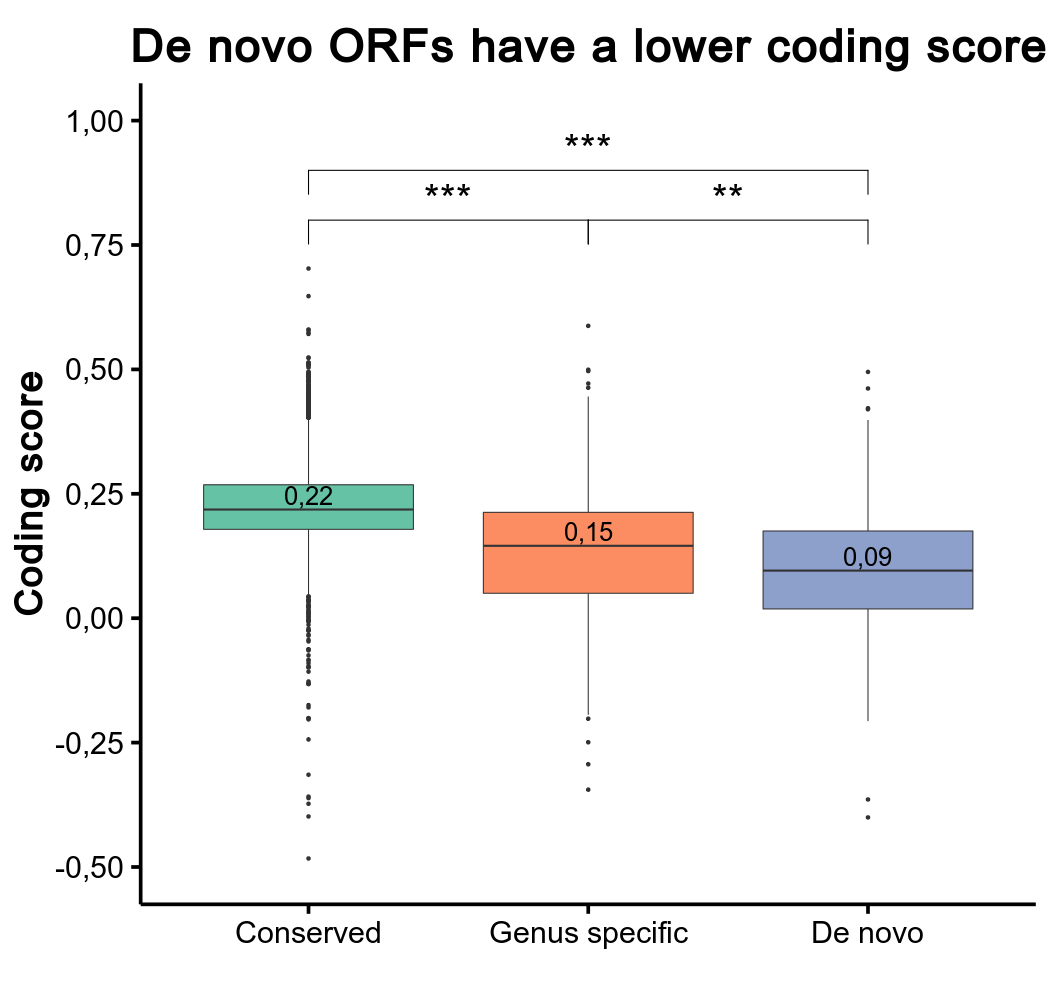

In [81]:
%%R -w 1050 -h 1000 -u px

all_proteins<-merge(Blevins_etal_dataset$complete_orfeome,all_coding_transcripts, by="transcript_ID")
translated<-subset(all_proteins,  as.numeric(pvalue_normal)>0.7 |as.numeric(pvalue_stress)>0.7)
novel_expressed_and_translated<-subset(translated,expressed_in_condition_15_15!='neither' & Source=='Novel'& ORF_length_nt >=30 )
dim(novel_expressed_and_translated)

all_proteins$coding_score<- as.numeric(all_proteins$coding_score)
best_ORFs_per_transcript<-subset(all_proteins,all_proteins$ORF_ID==all_proteins$longest_translated_ORF_ID_normal|all_proteins$ORF_ID==all_proteins$longest_translated_ORF_ID_stress)

medians<-best_ORFs_per_transcript %>% group_by(conservation_level) %>% summarise(median = median(coding_score, na.rm = TRUE))

orf_coding_score_boxplot<- ggplot(best_ORFs_per_transcript, aes(x=conservation_level, y=coding_score,fill=conservation_level)) + 
    geom_boxplot(notch=FALSE)+
    geom_signif(comparisons = list(c("De novo", "Genus specific"), c("Genus specific", "Conserved")),map_signif_level = TRUE, textsize=14,y_position=.8)+
    geom_signif(comparisons = list(c("De novo", "Conserved")),y_position=.9,map_signif_level = TRUE, textsize=14)+
    scale_fill_brewer(palette="Set2", guide=FALSE)+
    labs(list(title = "De novo ORFs have a lower coding score", y = "Coding score",fill="Conservation level",x=""))+
    scale_y_continuous(breaks=c(-.5,-.25,0,0.25,.5,.75,1),limits=c(-.5,1))+
    geom_text(data = medians, aes(x = conservation_level, y = median, label = sprintf("%0.2f", round(medians$median, digits = 2)), vjust = -.25),size = 9)+
    NULL
orf_coding_score_boxplot + theme_Publication()


## 4d De novo peptides have a higher isoelectric point

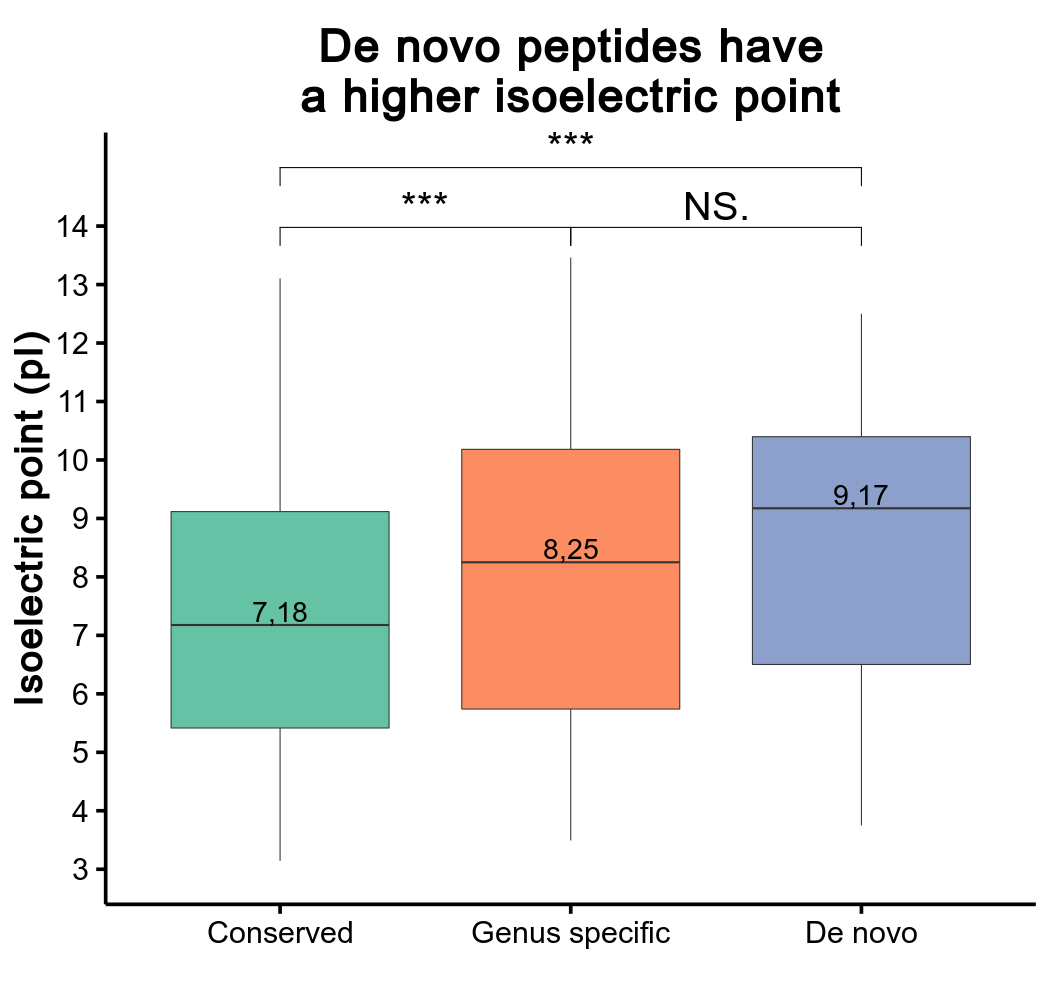

In [55]:
%%R -w 1050 -h 1000 -u px

##Check the isoelectric point of a given sequence
best_ORFs_per_transcript['isoelectric_point']<-NA
    pI_values<-sapply(best_ORFs_per_transcript$sequence, function(x) pI(x,pKscale= "EMBOSS") )
    best_ORFs_per_transcript$isoelectric_point=pI_values

medians<-best_ORFs_per_transcript %>% group_by(conservation_level) %>% summarise(median = median(isoelectric_point, na.rm = TRUE))

orf_isoelectric_boxplot<- ggplot(best_ORFs_per_transcript, aes(x=conservation_level, y=isoelectric_point,fill=conservation_level)) + 
    geom_boxplot(notch=FALSE)+
    geom_signif(comparisons = list(c("De novo", "Genus specific"), c("Genus specific", "Conserved")),map_signif_level = TRUE, textsize=14)+
    geom_signif(comparisons = list(c("De novo", "Conserved")),y_position=15, map_signif_level = TRUE, textsize=14)+
    scale_fill_brewer(palette="Set2", guide=FALSE)+
    scale_y_continuous(breaks=c(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14),limits=c(3,15))+
    labs(list(title = "De novo peptides have\na higher isoelectric point", y = "Isoelectric point (pI)",fill="Conservation level",x=""))+
    geom_text(data = medians, aes(x = conservation_level, y = median, label = sprintf("%0.2f", round(medians$median, digits = 2))),size = 10, vjust = -.15)
    NULL
orf_isoelectric_boxplot + theme_Publication()

# Figure 5



## 5a

<img src="photos_and_figures/new_figure_5a.png">

## 5b Half of de novo transcripts are overlapping other features


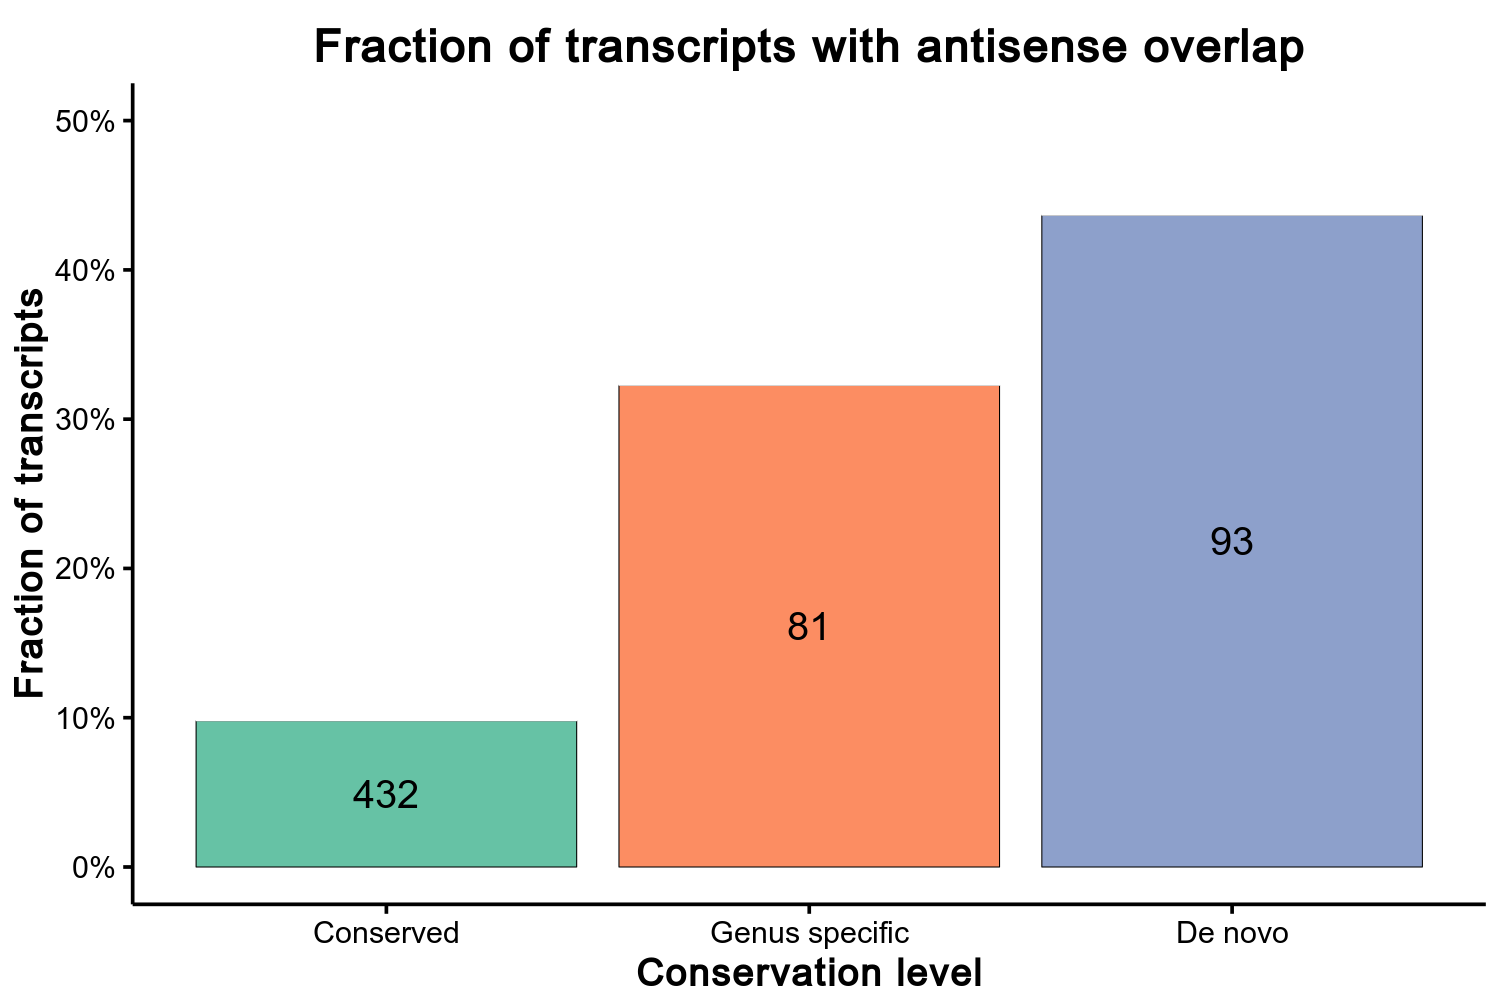

In [56]:
%%R -w 1500 -h 1000 -u px

Blevins_etal_dataset$complete_transcriptome$antisense_overlap <- factor(Blevins_etal_dataset$complete_transcriptome$antisense_overlap, levels = c("Yes","No"))

overlap_opposite_over_15 <- as.data.frame(table(subset(Blevins_etal_dataset$complete_transcriptome,Blevins_etal_dataset$complete_transcriptome$expressed_in_condition_15_15!='neither')$conservation_level, subset(Blevins_etal_dataset$complete_transcriptome,Blevins_etal_dataset$complete_transcriptome$expressed_in_condition_15_15!='neither')$antisense_overlap))
names(overlap_opposite_over_15) <- c("Conservation_level","Is_overlap_opposite","Number_of_transcripts")
overlap_opposite_over_15$Is_overlap_opposite <- factor(overlap_opposite_over_15$Is_overlap_opposite, levels = c("No","Yes"))


overlap_opposite_over_15_plot<-ggplot(overlap_opposite_over_15, aes(Conservation_level,Number_of_transcripts,fill=Is_overlap_opposite,label = ifelse(Is_overlap_opposite=="No", "", Number_of_transcripts))) +     
    labs(list(title = "Fraction of transcripts with antisense overlap", x = "Conservation level", y = "Fraction of transcripts",fill="Overlaps antisense transcripts"))+
    theme_Publication()+  
    geom_bar(color=c("black",'white',"black",'white',"black",'white'),position = "fill",stat = "identity", fill=c("#66C2A5",'white', "#FC8D62",'white', "#8DA0CB",'white'))+
    scale_y_continuous(labels = percent_format())+
    coord_cartesian(xlim = NULL, ylim = c(0,.5))+
    geom_text(size = 14, position = position_fill(vjust = .5))+
    NULL
overlap_opposite_over_15_plot




## 5c Correlation in expression of overlapping antisense pairs

In [8]:
%%R
Blevins_etal_dataset$overlapping_transcripts['expressed_in_condition_15_15_sense']<-NA
    mask_normal_15_15_sense <- Blevins_etal_dataset$overlapping_transcripts$TPM_normal_sense>=15 & Blevins_etal_dataset$overlapping_transcripts$TPM_stress_sense<15
    mask_stress_15_15_sense <- Blevins_etal_dataset$overlapping_transcripts$TPM_stress_sense>=15 & Blevins_etal_dataset$overlapping_transcripts$TPM_normal_sense<15
    mask_both_15_15_sense <- Blevins_etal_dataset$overlapping_transcripts$TPM_stress_sense>=15 & Blevins_etal_dataset$overlapping_transcripts$TPM_normal_sense>=15
    mask_neither_15_15_sense <- Blevins_etal_dataset$overlapping_transcripts$TPM_stress_sense<15 & Blevins_etal_dataset$overlapping_transcripts$TPM_normal_sense<15
    Blevins_etal_dataset$overlapping_transcripts[mask_normal_15_15_sense,]$expressed_in_condition_15_15_sense <- 'normal'
    Blevins_etal_dataset$overlapping_transcripts[mask_stress_15_15_sense,]$expressed_in_condition_15_15_sense <- 'stress'
    Blevins_etal_dataset$overlapping_transcripts[mask_both_15_15_sense,]$expressed_in_condition_15_15_sense <- 'both'
    Blevins_etal_dataset$overlapping_transcripts[mask_neither_15_15_sense,]$expressed_in_condition_15_15_sense <- 'neither'

Blevins_etal_dataset$overlapping_transcripts['expressed_in_condition_15_15_anti']<-NA
    mask_normal_15_15_anti <- Blevins_etal_dataset$overlapping_transcripts$TPM_normal_anti>=15 & Blevins_etal_dataset$overlapping_transcripts$TPM_stress_anti<15
    mask_stress_15_15_anti <- Blevins_etal_dataset$overlapping_transcripts$TPM_stress_anti>=15 & Blevins_etal_dataset$overlapping_transcripts$TPM_normal_anti<15
    mask_both_15_15_anti <- Blevins_etal_dataset$overlapping_transcripts$TPM_stress_anti>=15 & Blevins_etal_dataset$overlapping_transcripts$TPM_normal_anti>=15
    mask_neither_15_15_anti <- Blevins_etal_dataset$overlapping_transcripts$TPM_stress_anti<15 & Blevins_etal_dataset$overlapping_transcripts$TPM_normal_anti<15
    Blevins_etal_dataset$overlapping_transcripts[mask_normal_15_15_anti,]$expressed_in_condition_15_15_anti <- 'normal'
    Blevins_etal_dataset$overlapping_transcripts[mask_stress_15_15_anti,]$expressed_in_condition_15_15_anti <- 'stress'
    Blevins_etal_dataset$overlapping_transcripts[mask_both_15_15_anti,]$expressed_in_condition_15_15_anti <- 'both'
    Blevins_etal_dataset$overlapping_transcripts[mask_neither_15_15_anti,]$expressed_in_condition_15_15_anti <- 'neither'


Blevins_etal_dataset$overlapping_transcripts['logFC_sense']<-NA
    Blevins_etal_dataset$overlapping_transcripts['logFC_sense']<-log(Blevins_etal_dataset$overlapping_transcripts$TPM_stress_sense/Blevins_etal_dataset$overlapping_transcripts$TPM_normal_sense)
Blevins_etal_dataset$overlapping_transcripts['logFC_anti']<-NA
    Blevins_etal_dataset$overlapping_transcripts['logFC_anti']<-log(Blevins_etal_dataset$overlapping_transcripts$TPM_stress_anti/Blevins_etal_dataset$overlapping_transcripts$TPM_normal_anti)

temp<-subset(Blevins_etal_dataset$overlapping_transcripts,conservation_sense=="De novo" & expressed_in_condition_15_15_sense!='neither')
temp2<-subset(Blevins_etal_dataset$overlapping_transcripts,conservation_anti=="De novo" & expressed_in_condition_15_15_anti!='neither')
temp3<-temp2[,c(2,1,4,3,5,7,6,9,8,11,10,13,12,15,14)]
names(temp3)<-c("NameSense","NameAntisense", "LengthOverlap", "PercentOverlapSense", "PercentOverlapAntisense", "TPM_normal_sense", "TPM_normal_anti", "TPM_stress_sense", "TPM_stress_anti", "conservation_sense", "conservation_anti","expressed_in_condition_15_15_sense","expressed_in_condition_15_15_anti","logFC_sense","logFC_anti")
de_novo_expressed_transcripts_with_antisense_pair<-rbind(temp,temp3)


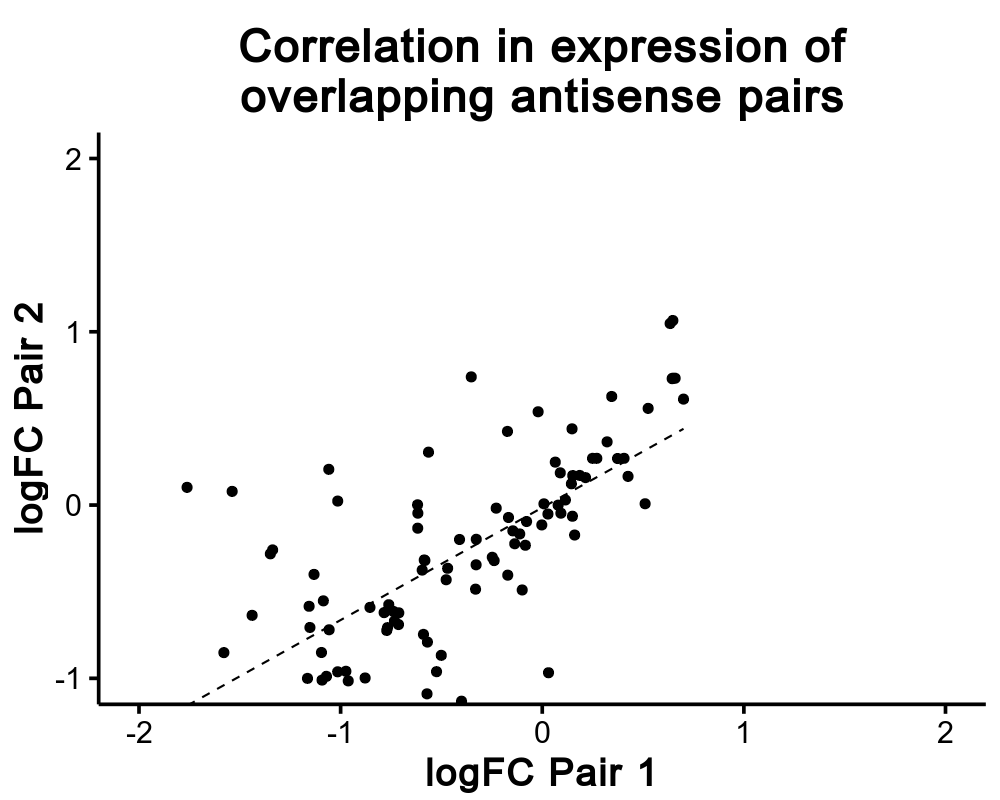

In [22]:
%%R -w 1000 -h 800 -u px
# Subset of pairs, where pair 1 == De novo and pair 2 == anything

corr <- paste("R == ", round(cor(de_novo_expressed_transcripts_with_antisense_pair$logFC_sense, de_novo_expressed_transcripts_with_antisense_pair$logFC_anti,use = "complete.obs",method="spearman"),2))

antisense_overlapping_de_novo_first_pair_plot<-ggplot(de_novo_expressed_transcripts_with_antisense_pair,aes(x=logFC_sense,y=logFC_anti,size=4))+
    geom_point(aes())+
    coord_cartesian(ylim=c(-1,2),xlim=c(-2,2))+
    labs(list(title="Correlation in expression of\noverlapping antisense pairs",y = "logFC Pair 2", x = "logFC Pair 1"))+
#     annotate(x=-1.3, y=.5, label=paste(corr), parse=TRUE,   geom="text", size=14)+
    geom_smooth(method = "lm", se = FALSE,aes(color = NULL),color='black',size=1,lty=2)+
    NULL

antisense_overlapping_de_novo_first_pair_plot + theme_Publication() + theme(legend.position = "none")

## 5d

<img src="photos_and_figures/new_figure_5d.png">

## 5e No conservation level enriched in divergent orientation 


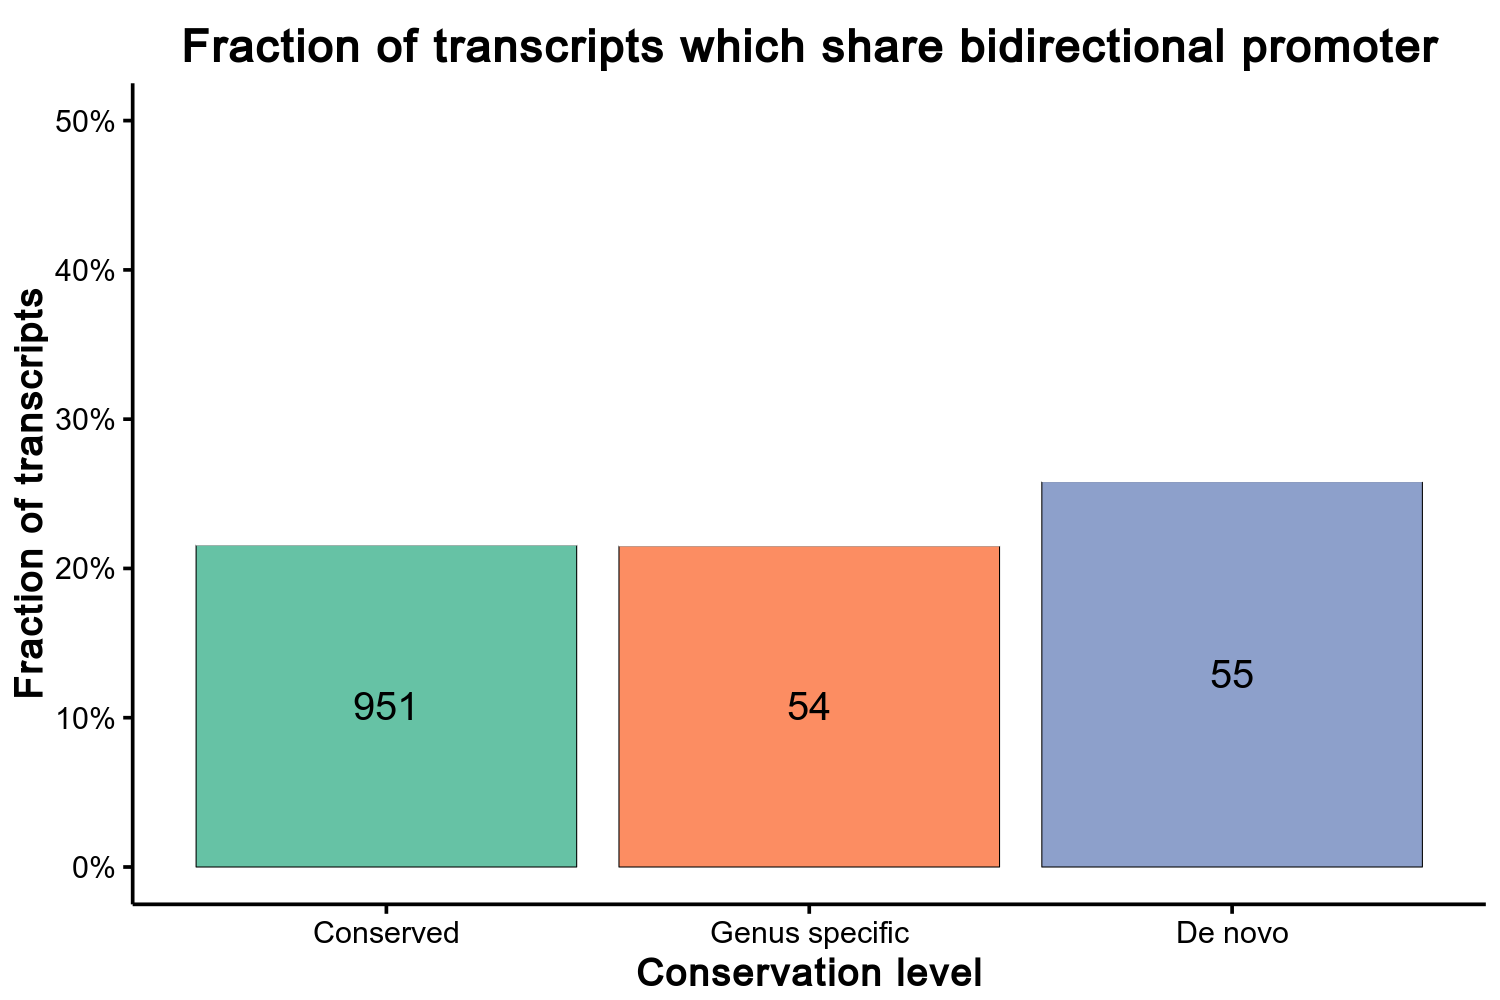

In [58]:
%%R -w 1500 -h 1000 -u px

Blevins_etal_dataset$complete_transcriptome$is_divergent <- factor(Blevins_etal_dataset$complete_transcriptome$is_divergent, levels = c("Yes","No"))

divergent_over_15 <- as.data.frame(table(subset(Blevins_etal_dataset$complete_transcriptome,Blevins_etal_dataset$complete_transcriptome$expressed_in_condition_15_15!='neither')$conservation_level, subset(Blevins_etal_dataset$complete_transcriptome,Blevins_etal_dataset$complete_transcriptome$expressed_in_condition_15_15!='neither')$is_divergent))

names(divergent_over_15) <- c("Conservation_level","Is_divergent","Number_of_transcripts")

divergent_over_15$Is_divergent <- factor(divergent_over_15$Is_divergent, levels = c("No","Yes"))

divergent_over_15_plot<-ggplot(divergent_over_15, aes(Conservation_level,Number_of_transcripts,fill=Is_divergent,label = ifelse(Is_divergent=="No", "", Number_of_transcripts))) +     
    labs(list(title = "Fraction of transcripts which share bidirectional promoter", x = "Conservation level", y = "Fraction of transcripts",fill="Divergent transcripts"))+
    theme_Publication()+  
    geom_bar(color=c("black",'white',"black",'white',"black",'white'),position = "fill",stat = "identity", fill=c("#66C2A5",'white', "#FC8D62",'white', "#8DA0CB",'white'))+
    scale_y_continuous(labels = percent_format())+
    coord_cartesian(xlim = NULL, ylim = c(0,.5))+
    geom_text(size = 14, position = position_fill(vjust = .5))+
    NULL
divergent_over_15_plot




## 5f

In [26]:
%%R
Blevins_etal_dataset$divergent_transcripts['expressed_in_condition_15_15_sense']<-NA
    mask_normal_15_15_sense <- Blevins_etal_dataset$divergent_transcripts$TPM_normal_sense>=15 & Blevins_etal_dataset$divergent_transcripts$TPM_stress_sense<15
    mask_stress_15_15_sense <- Blevins_etal_dataset$divergent_transcripts$TPM_stress_sense>=15 & Blevins_etal_dataset$divergent_transcripts$TPM_normal_sense<15
    mask_both_15_15_sense <- Blevins_etal_dataset$divergent_transcripts$TPM_stress_sense>=15 & Blevins_etal_dataset$divergent_transcripts$TPM_normal_sense>=15
    mask_neither_15_15_sense <- Blevins_etal_dataset$divergent_transcripts$TPM_stress_sense<15 & Blevins_etal_dataset$divergent_transcripts$TPM_normal_sense<15
    Blevins_etal_dataset$divergent_transcripts[mask_normal_15_15_sense,]$expressed_in_condition_15_15_sense <- 'normal'
    Blevins_etal_dataset$divergent_transcripts[mask_stress_15_15_sense,]$expressed_in_condition_15_15_sense <- 'stress'
    Blevins_etal_dataset$divergent_transcripts[mask_both_15_15_sense,]$expressed_in_condition_15_15_sense <- 'both'
    Blevins_etal_dataset$divergent_transcripts[mask_neither_15_15_sense,]$expressed_in_condition_15_15_sense <- 'neither'

Blevins_etal_dataset$divergent_transcripts['expressed_in_condition_15_15_anti']<-NA
    mask_normal_15_15_anti <- Blevins_etal_dataset$divergent_transcripts$TPM_normal_anti>=15 & Blevins_etal_dataset$divergent_transcripts$TPM_stress_anti<15
    mask_stress_15_15_anti <- Blevins_etal_dataset$divergent_transcripts$TPM_stress_anti>=15 & Blevins_etal_dataset$divergent_transcripts$TPM_normal_anti<15
    mask_both_15_15_anti <- Blevins_etal_dataset$divergent_transcripts$TPM_stress_anti>=15 & Blevins_etal_dataset$divergent_transcripts$TPM_normal_anti>=15
    mask_neither_15_15_anti <- Blevins_etal_dataset$divergent_transcripts$TPM_stress_anti<15 & Blevins_etal_dataset$divergent_transcripts$TPM_normal_anti<15
    Blevins_etal_dataset$divergent_transcripts[mask_normal_15_15_anti,]$expressed_in_condition_15_15_anti <- 'normal'
    Blevins_etal_dataset$divergent_transcripts[mask_stress_15_15_anti,]$expressed_in_condition_15_15_anti <- 'stress'
    Blevins_etal_dataset$divergent_transcripts[mask_both_15_15_anti,]$expressed_in_condition_15_15_anti <- 'both'
    Blevins_etal_dataset$divergent_transcripts[mask_neither_15_15_anti,]$expressed_in_condition_15_15_anti <- 'neither'


Blevins_etal_dataset$divergent_transcripts['logFC_sense']<-NA
    Blevins_etal_dataset$divergent_transcripts['logFC_sense']<-log(Blevins_etal_dataset$divergent_transcripts$TPM_stress_sense/Blevins_etal_dataset$divergent_transcripts$TPM_normal_sense)
Blevins_etal_dataset$divergent_transcripts['logFC_anti']<-NA
    Blevins_etal_dataset$divergent_transcripts['logFC_anti']<-log(Blevins_etal_dataset$divergent_transcripts$TPM_stress_anti/Blevins_etal_dataset$divergent_transcripts$TPM_normal_anti)

temp<-subset(Blevins_etal_dataset$divergent_transcripts,conservation_sense=="De novo" & expressed_in_condition_15_15_sense!='neither')
temp2<-subset(Blevins_etal_dataset$divergent_transcripts,conservation_anti=="De novo" & expressed_in_condition_15_15_anti!='neither')
temp3<-temp2[,c(2,1,3,5,4,7,6,9,8,11,10,13,12)]
names(temp3)<-c("NameSense","NameAntisense", "DistanceBetweenTSSs","TPM_normal_sense", "TPM_normal_anti", "TPM_stress_sense", "TPM_stress_anti", "conservation_sense", "conservation_anti","expressed_in_condition_15_15_sense","expressed_in_condition_15_15_anti","logFC_sense","logFC_anti")
de_novo_expressed_transcripts_with_divergent_pair<-rbind(temp,temp3)


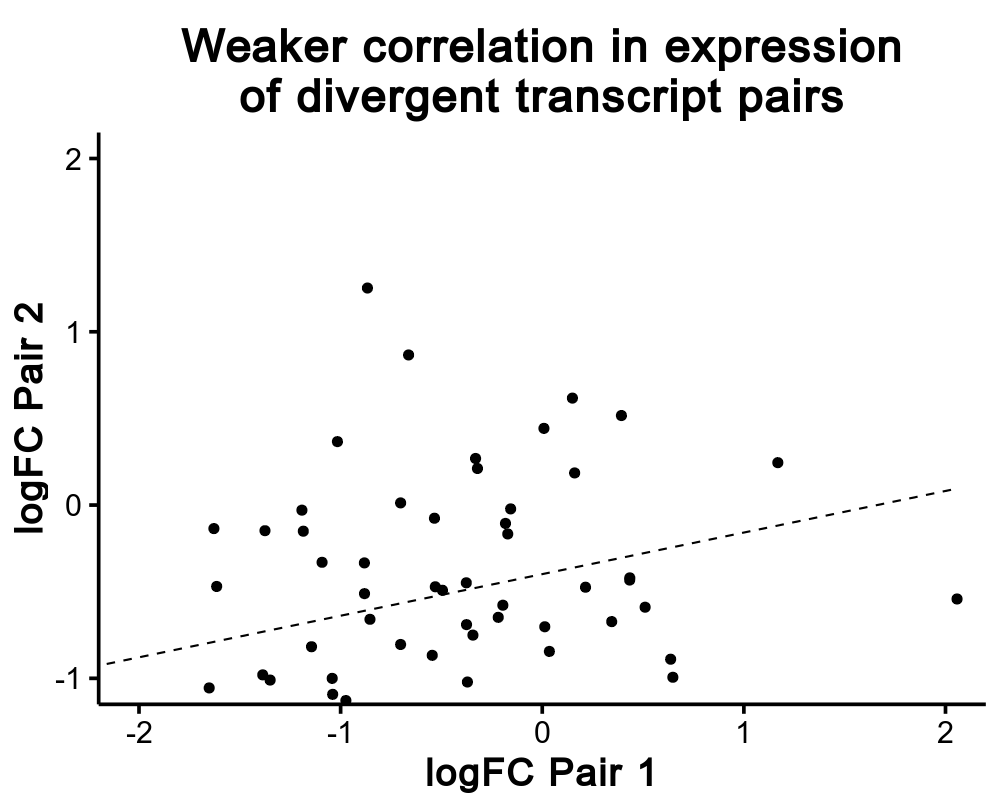

In [30]:
%%R -w 1000 -h 800 -u px
# Subset of pairs, where pair 1 == De novo and pair 2 == anything

corr <- paste("R == ", round(cor(de_novo_expressed_transcripts_with_divergent_pair$logFC_sense, de_novo_expressed_transcripts_with_divergent_pair$logFC_anti,use = "complete.obs",method="spearman"),2))


divergent_de_novo_first_pair_plot<-ggplot(de_novo_expressed_transcripts_with_divergent_pair,aes(x=logFC_sense,y=logFC_anti,size=4))+
    geom_point(aes())+
    coord_cartesian(ylim=c(-1,2),xlim=c(-2,2))+
    labs(list(title="Weaker correlation in expression\nof divergent transcript pairs",y = "logFC Pair 2", x = "logFC Pair 1"))+
#     annotate(x=-1.3, y=.5, label=paste(corr), parse=TRUE,   geom="text", size=14)+
    geom_smooth(method = "lm", se = FALSE,aes(color = NULL),color='black',size=1,lty=2)+
    NULL

divergent_de_novo_first_pair_plot + theme_Publication() + theme(legend.position = "none")